DESCRIPTIVE ANALYSIS & UNSUPERVISED METHODS

1. Libraries and data importation

In [213]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
exec(open('functions sy09/utils.py').read())
exec(open('functions sy09/utils_tp05.py').read())
exec(open('functions sy09/utils_tp06.py').read())

1. Dataset description

A. General Analysis

In [214]:
data = pd.read_csv("data/Student_performance_data-_.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [215]:
data.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [216]:
data.duplicated().sum()

0

Global analysis: no gaps in the data and no duplicates. A total of 15 variables and 2,392 individuals.

B. Verifications of the ranges

In [217]:
def check_range(df, col, min_val, max_val):
    return df[(df[col] < min_val) | (df[col] > max_val)]

check_range(data, 'Age', 15, 18)
check_range(data, 'Absences', 0, 30)
check_range(data, 'GPA', 0, 4)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []

In [218]:
data[(data['GPA'] < 2.0) & (data['GradeClass'] != 4)][['GPA', 'GradeClass']]

GPA  GradeClass
2178  1.795369         3.0
2181  1.844056         1.0
2182  1.305585         2.0
2186  1.557870         3.0
2190  0.871999         3.0
...        ...         ...
2382  1.191929         3.0
2383  1.810038         3.0
2385  1.395631         1.0
2389  1.142333         2.0
2390  1.803297         1.0

[85 rows x 2 columns]

In [219]:
data[(data['GPA'] < 2.0)]

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
2          1003   15       0          2                  3         4.210570   
4          1005   17       1          0                  2         4.672495   
7          1008   15       1          1                  4        15.424496   
11         1012   17       0          0                  1         7.598486   
12         1013   17       0          1                  1        10.038712   
...         ...  ...     ...        ...                ...              ...   
2382       3383   16       0          0                  3        13.941823   
2383       3384   16       1          2                  2        11.736409   
2385       3386   16       1          0                  1         1.445434   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
2           26         0                2                0       0      0   
4           17         1                3                0       0      0   
7           22         1                1                1       0      0   
11          15         0                2                0       0      0   
12          21         0                3                1       0      0   
...        ...       ...              ...              ...     ...    ...   
2382        20         0                2                0       0      0   
2383        18         1                4                0       0      0   
2385        20         0                3                1       1      0   
2389        20         0                2                0       0      0   
2390        17         0                2                0       1      1   

      Volunteering       GPA  GradeClass  
2                0  0.112602         4.0  
4                0  1.288061         4.0  
7                0  1.360143         4.0  
11               1  1.559595         4.0  
12               0  1.520078         4.0  
...            ...       ...         ...  
2382             0  1.191929         3.0  
2383             0  1.810038         3.0  
2385             0  1.395631         1.0  
2389             1  1.142333         2.0  
2390             0  1.803297         1.0  

[1274 rows x 15 columns]

We note that the ranking does not always correspond to the GPA (quality check): 85 for 1274 (approx. 6.5%). Is this due to a data entry error? It's not really negligible.

In [220]:
data[data['StudentID'] == 1001] #ATTENTION DECALAGE ENTRE CSV ET TABLEAU : commence à 0 et la première ligne correspond à la description des variables (décalage de 2)

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0

In [221]:
#fonction pour avoir le bon classement pour chaque GPA
def classification_classe(gpa):
    if gpa >= 3.5:
        return 0  # A
    elif gpa >= 3.0:
        return 1  # B
    elif gpa >= 2.5:
        return 2  # C
    elif gpa >= 2.0:
        return 3  # D
    else:
        return 4  # F

data['GradeClass'] = data['GPA'].apply(classification_classe)
data['GradeClass']

0       2
1       1
2       4
3       3
4       4
       ..
2387    1
2388    1
2389    4
2390    4
2391    3
Name: GradeClass, Length: 2392, dtype: int64

In [222]:
data[(data['GPA'] < 2.0) & (data['GradeClass'] != 4)][['GPA', 'GradeClass']] #vérif apès avoir utilisé notre fonction --> ok

Empty DataFrame
Columns: [GPA, GradeClass]
Index: []

Creation of a new variable taking all activities into account (an activity sum)

In [223]:
data['totalActivities'] = data[['Sports', 'Music', 'Volunteering', 'Extracurricular']].sum(axis=1)

In [224]:
data.to_csv('data/Student_performance_data_new_GradeClass.csv', index=False) #pour transporter les data dans un nouveau csv

We create 2 new csvs: one to get the new GradeClass values and one to check that they don't change (we remove the wrong GradeClass values).

In [225]:
data_new_grade_class = pd.read_csv('data/Student_performance_data_new_GradeClass.csv')

In [226]:
data_new_grade_class[(data_new_grade_class['GPA'] < 2.0) & (data_new_grade_class['GradeClass'] != 4)][['GPA', 'GradeClass']] #vérif : ok

Empty DataFrame
Columns: [GPA, GradeClass]
Index: []

In [227]:
data_pour_supprimer = pd.read_csv("data/Student_performance_data-_.csv")
before = len(data_pour_supprimer)
data_pour_supprimer = data_pour_supprimer[~((data_pour_supprimer['GPA'] < 2.0) & (data_pour_supprimer['GradeClass'] != 4))]
after = len(data_pour_supprimer)
print(f"{before - after} lignes supprimées.")

85 lignes supprimées.


In [228]:
data_pour_supprimer.to_csv('data/Student_performance_data_without_old_GradeClass.csv', index=False)
data_without_old_Grade_class = pd.read_csv('data/Student_performance_data_without_old_GradeClass.csv')

In [229]:
numeric_columns_new = data_new_grade_class.select_dtypes(include=['number']).drop(['StudentID'], axis=1).columns
print("Num values : ", numeric_columns_new)
Categorical_Col = data.select_dtypes(include=['object']).columns
print("Cat values : ", Categorical_Col)

Num values :  Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass', 'totalActivities'],
      dtype='object')
Cat values :  Index([], dtype='object')


In [230]:
numeric_columns_without = data_without_old_Grade_class.select_dtypes(include=['number']).drop(['StudentID'], axis=1).columns
print("Num values : ", numeric_columns_without)
Categorical_Col = data.select_dtypes(include=['object']).columns
print("Cat values : ", Categorical_Col)

Num values :  Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')
Cat values :  Index([], dtype='object')


2. Vizualisation methods

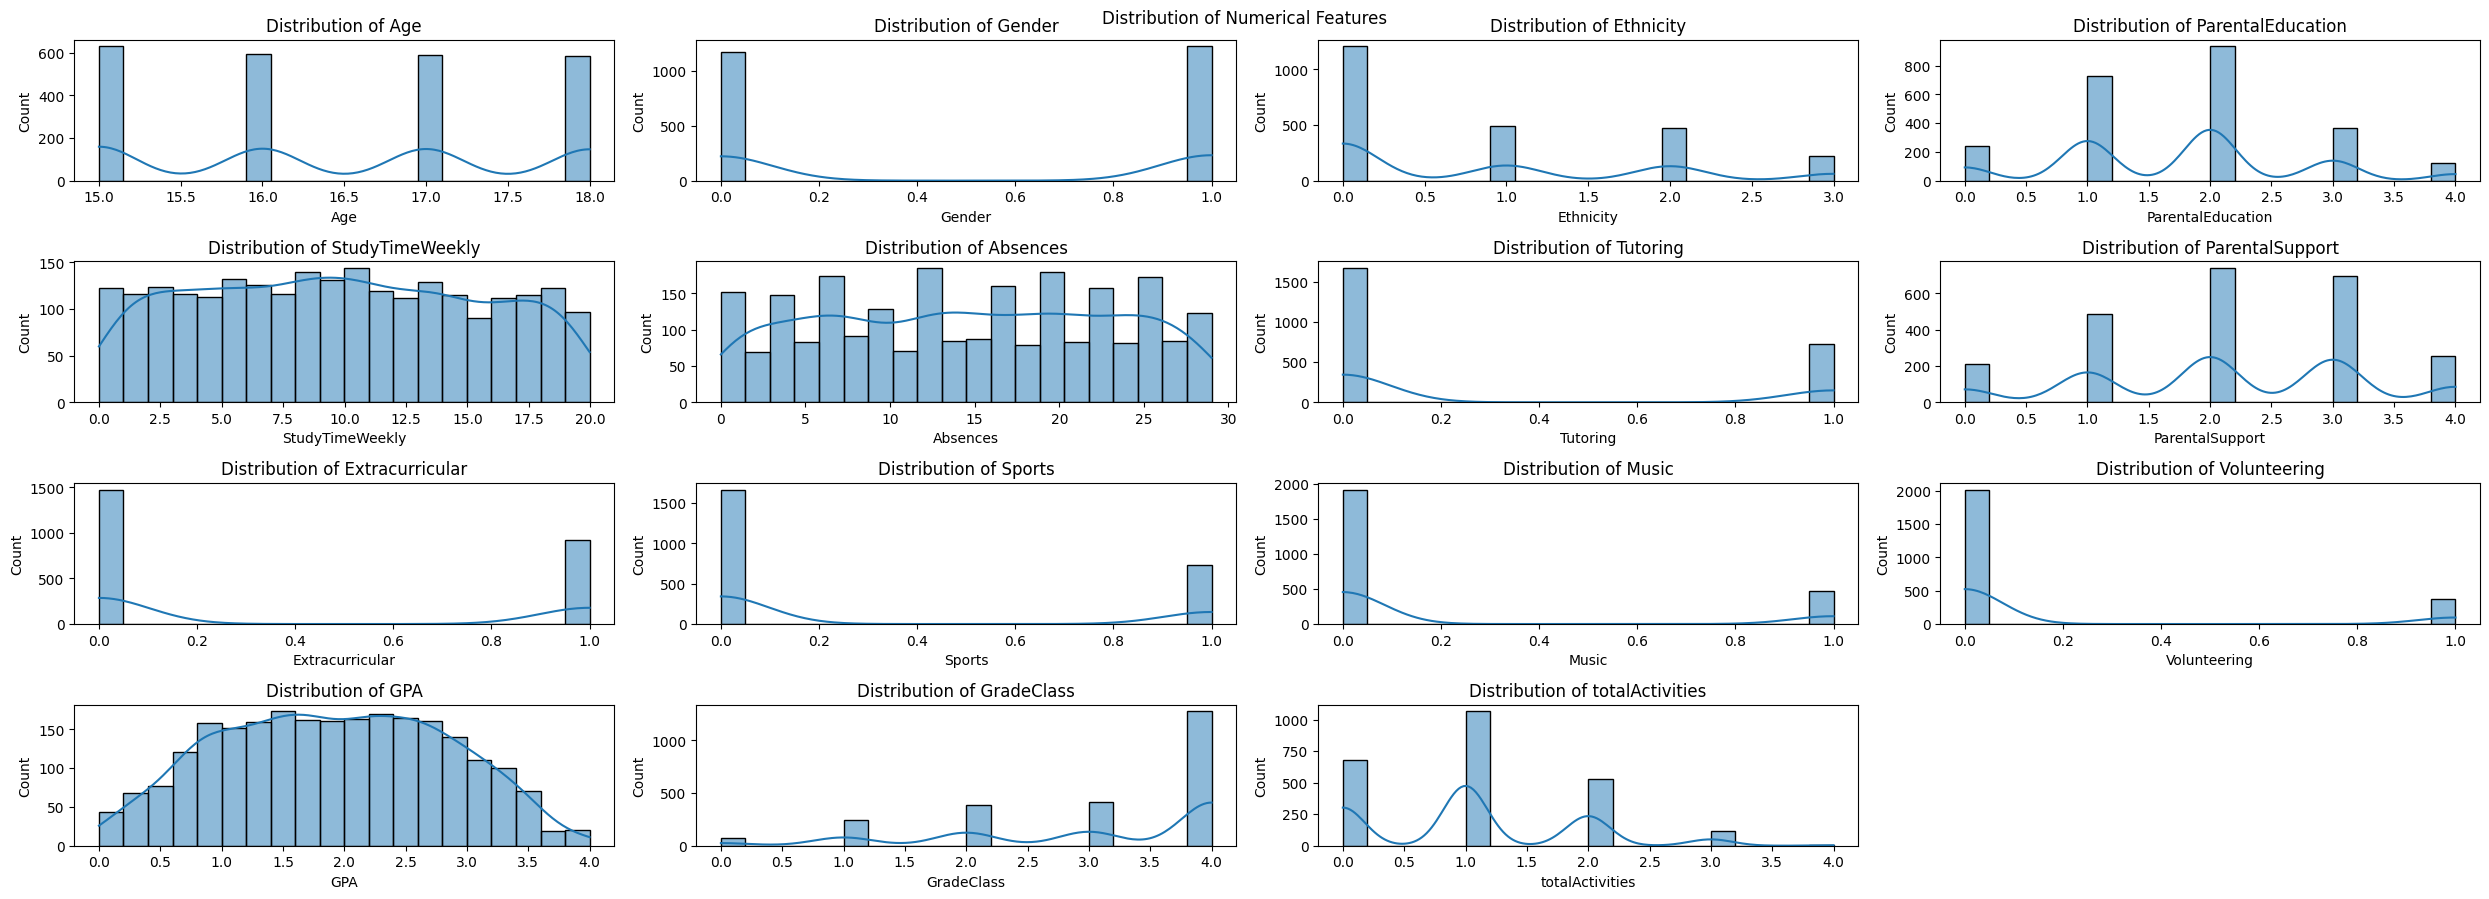

In [231]:
plt.figure(figsize=(25, 20))
for i, col in enumerate(numeric_columns_new, 1):
    plt.subplot(9, 4, i)
    sns.histplot(data_new_grade_class[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")

plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

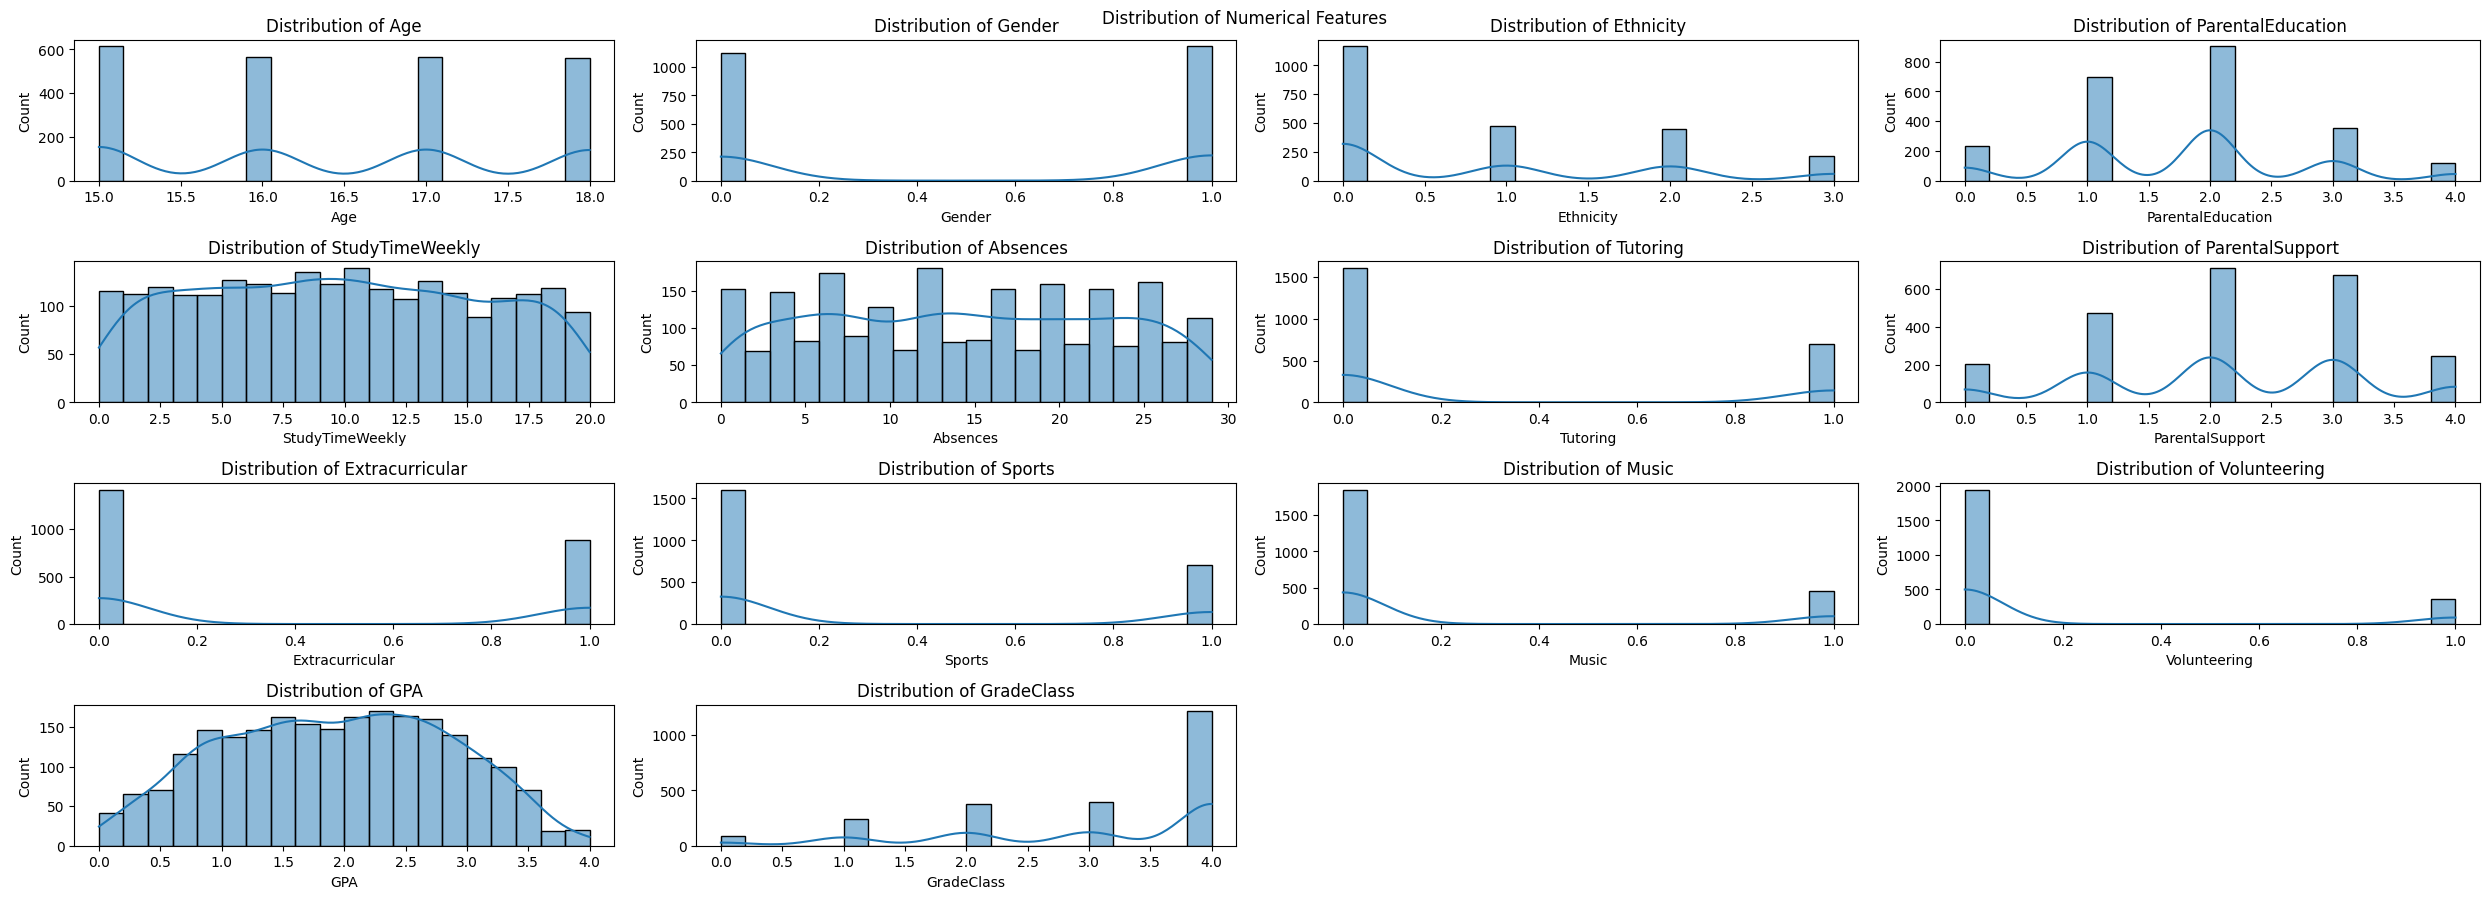

In [232]:
plt.figure(figsize=(25, 20))
for i, col in enumerate(numeric_columns_without, 1):
    plt.subplot(9, 4, i)
    sns.histplot(data_without_old_Grade_class[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")

plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

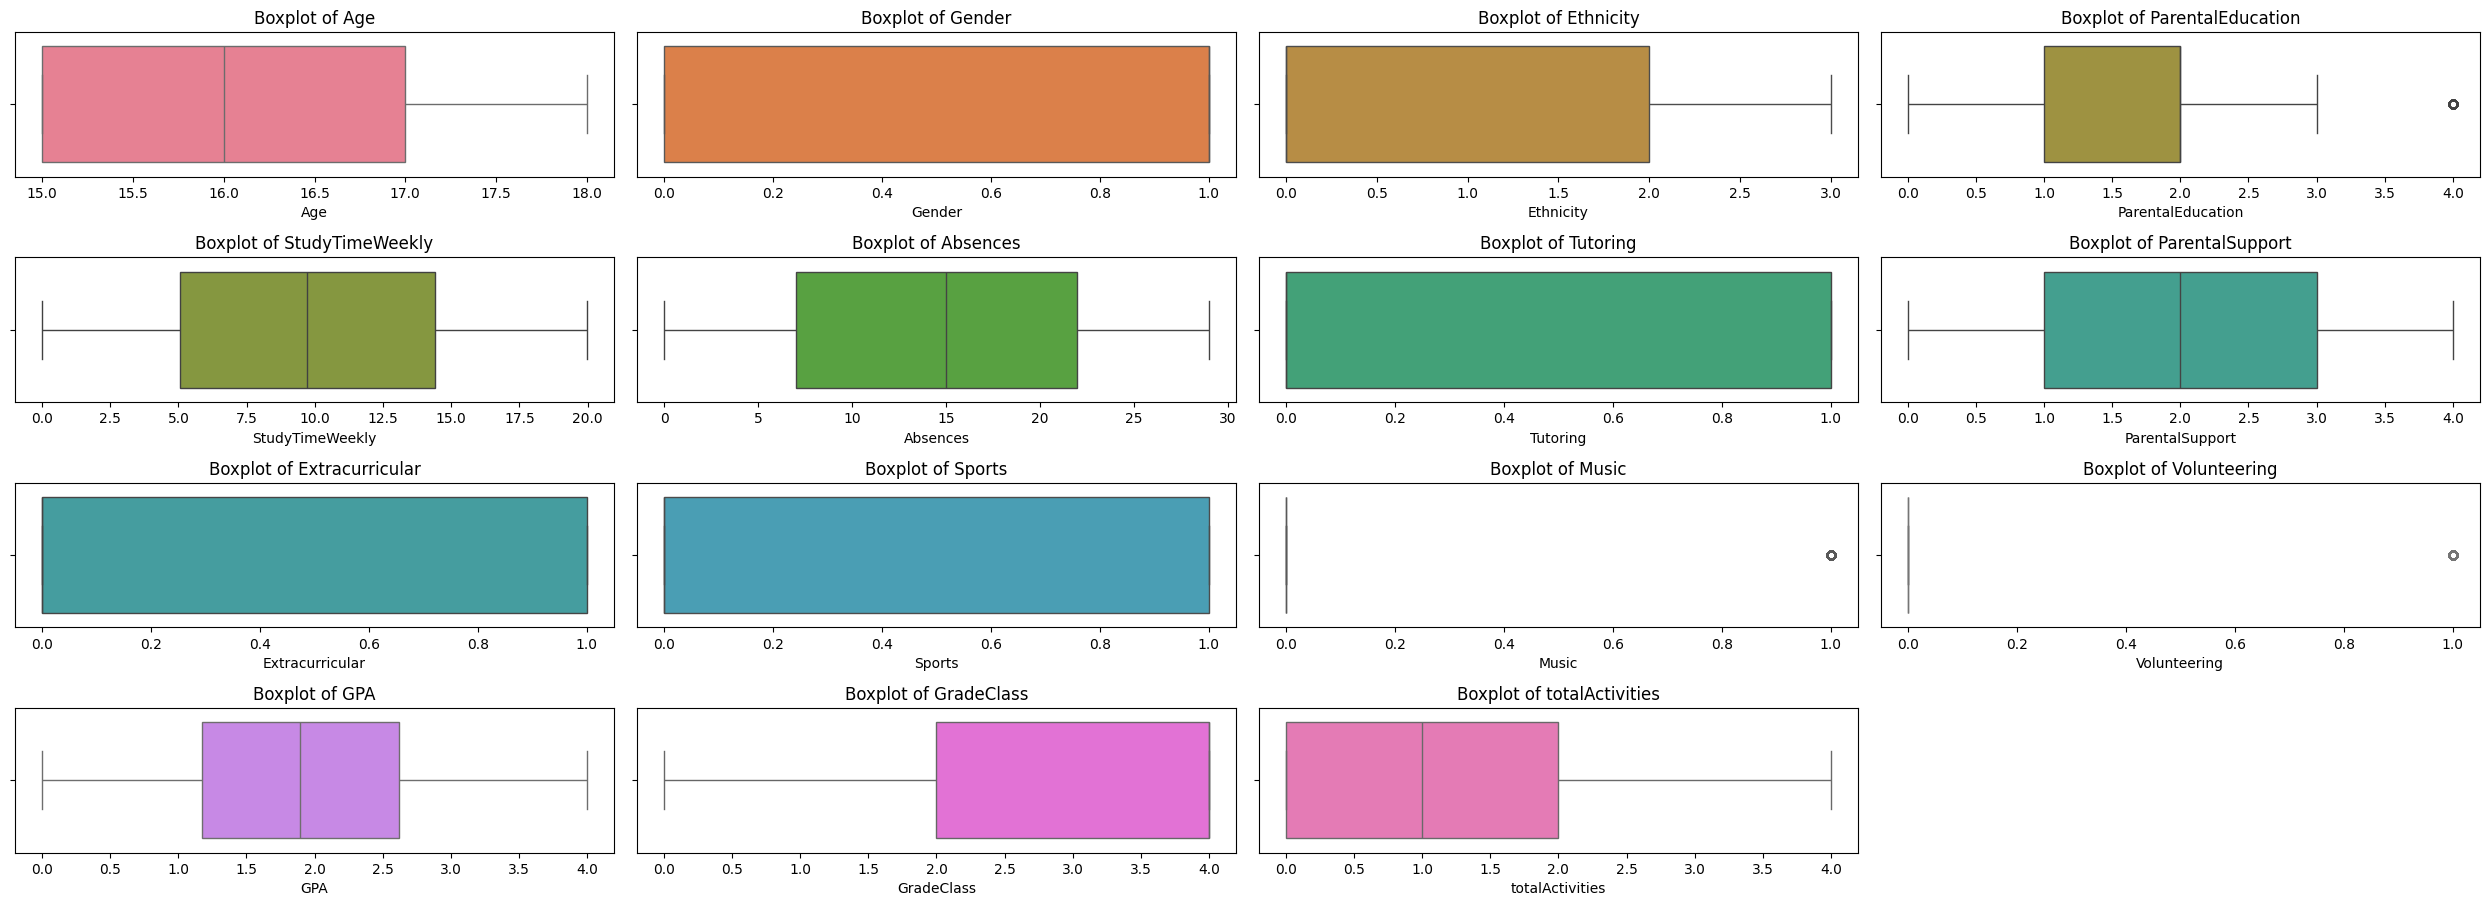

In [233]:
plt.figure(figsize=(25, 20))
palette = sns.color_palette("husl", len(numeric_columns_new)) 
for i, (col, color) in enumerate(zip(numeric_columns_new, palette), 1):
    plt.subplot(9, 4, i)
    sns.boxplot(x=data[col], color=color)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()

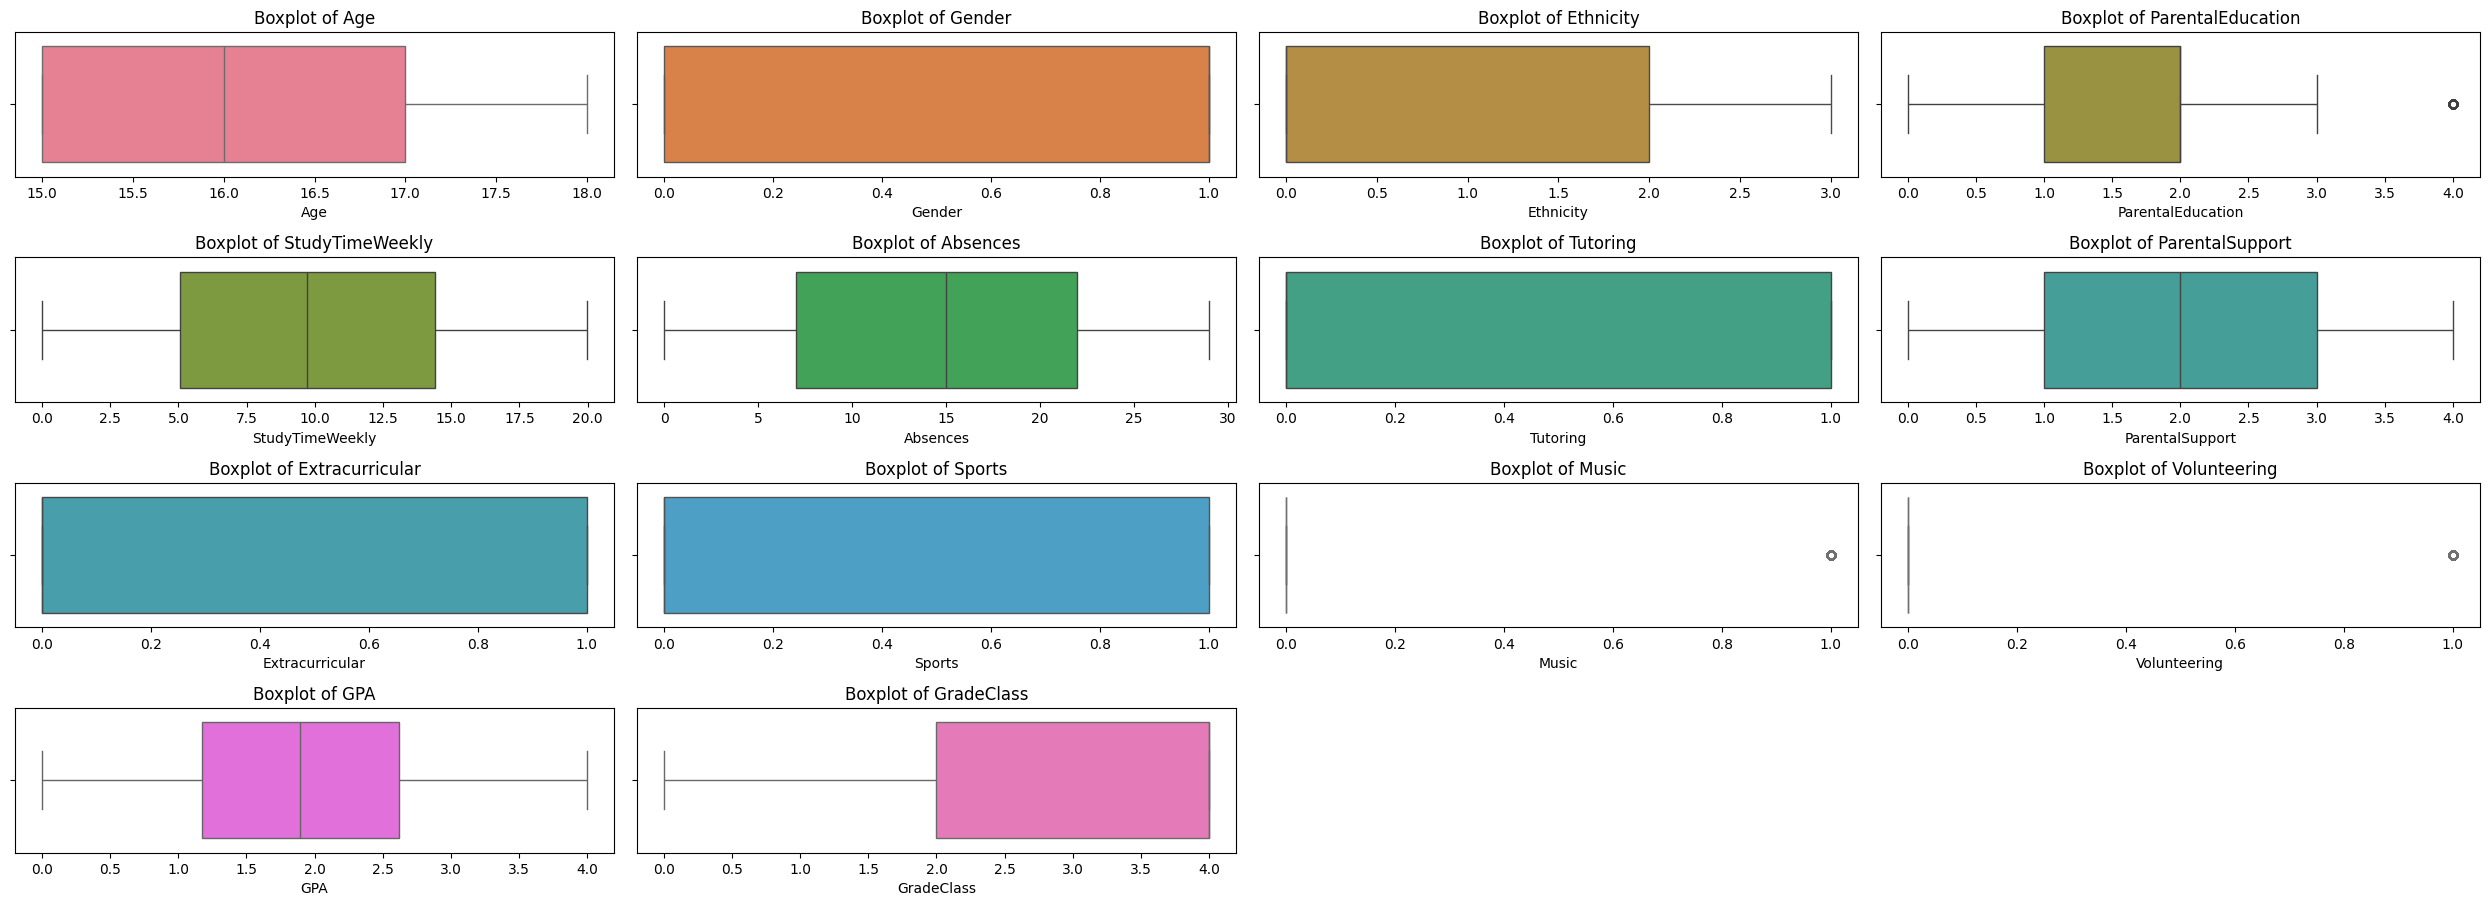

In [234]:
plt.figure(figsize=(25, 20))
palette = sns.color_palette("husl", len(numeric_columns_without)) 
for i, (col, color) in enumerate(zip(numeric_columns_without, palette), 1):
    plt.subplot(9, 4, i)
    sns.boxplot(x=data[col], color=color)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()

Outliers analysis

In [235]:
data_new_grade_class[data['Age'] < 15 | (data_new_grade_class['Age'] > 18)]

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass, totalActivities]
Index: []

No data-entry errors on the age of high school students.

In [236]:
data_new_grade_class[(data_new_grade_class['StudyTimeWeekly'] > 19) & (data_new_grade_class['Absences'] == 29) ]

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
95         1096   16       1          2                  3        19.278320   
1303       2304   16       0          0                  1        19.124423   
1327       2328   15       1          0                  1        19.444594   
1866       2867   16       0          0                  0        19.521412   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
95          29         0                3                0       0      0   
1303        29         1                3                1       1      0   
1327        29         1                4                1       0      1   
1866        29         0                3                1       1      0   

      Volunteering       GPA  GradeClass  totalActivities  
95               1  0.732908           4                1  
1303             0  1.623004           4                2  
1327             0  1.584479           4                2  
1866             0  1.078485           4                2

Case of very studious students but very, very high absenteeism. Linked to a low GPA.

In [237]:
data_new_grade_class[(data_new_grade_class['GPA'] >= 3.9) & (data_new_grade_class['ParentalSupport'] <= 1)]

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
1919       2920   15       0          3                  1        17.442121   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
1919         1         1                1                1       1      0   

      Volunteering  GPA  GradeClass  totalActivities  
1919             0  4.0           0                2

In [238]:
data_new_grade_class[(data_new_grade_class['GPA'] >= 3.9) & (data_new_grade_class['StudyTimeWeekly'] < 2) ]

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
2354       3355   16       1          0                  2          1.56549   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
2354         4         1                4                1       1      0   

      Volunteering       GPA  GradeClass  totalActivities  
2354             0  3.979421           0                2

In [239]:
data_new_grade_class[(data_new_grade_class['GPA'] < 2.5) & (data_new_grade_class['StudyTimeWeekly'] == 0) & (data_new_grade_class['ParentalSupport'] >= 3)]

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass, totalActivities]
Index: []

In [240]:
data_new_grade_class[(data_new_grade_class['ParentalEducation'] == 0) & (data_new_grade_class['GPA'] > 3.5)]

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
111        1112   17       1          3                  0         5.670144   
307        1308   16       1          2                  0         9.926455   
454        1455   15       1          2                  0         9.772099   
504        1505   17       1          1                  0        18.751007   
509        1510   16       1          2                  0        15.361788   
884        1885   18       0          2                  0        12.635497   
1120       2121   16       0          3                  0        12.353892   
1235       2236   18       0          2                  0        19.612964   
2028       3029   16       1          0                  0        18.656924   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
111          2         1                4                0       0      1   
307          4         0                4                0       1      0   
454          2         0                3                1       0      1   
504          0         1                4                1       0      0   
509          3         1                2                1       1      0   
884          0         1                2                0       0      0   
1120         6         1                3                1       1      0   
1235         2         1                0                1       0      0   
2028         0         1                4                1       0      0   

      Volunteering       GPA  GradeClass  totalActivities  
111              0  3.545159           0                1  
307              1  3.645738           0                2  
454              0  3.587736           0                2  
504              0  3.947093           0                1  
509              0  3.666291           0                2  
884              0  3.707948           0                0  
1120             0  3.520931           0                2  
1235             0  3.515416           0                1  
2028             1  4.000000           0                2

<Axes: xlabel='ParentalEducation', ylabel='GPA'>

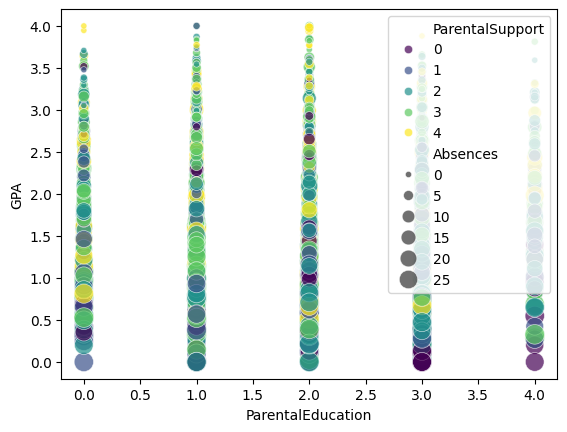

In [241]:
sns.scatterplot(data=data_new_grade_class, x='ParentalEducation', y='GPA', hue='ParentalSupport', size='Absences', palette='viridis', sizes=(20, 200),alpha=0.7)

Gender
1    1222
0    1170
Name: count, dtype: int64


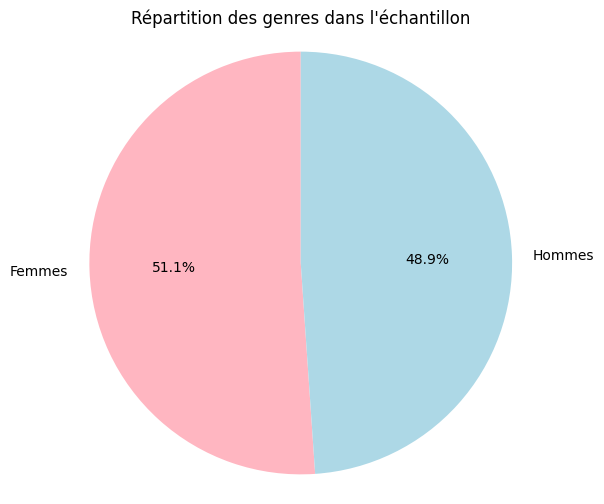

In [242]:
genre_counts = data_new_grade_class['Gender'].value_counts()
print(genre_counts)
plt.figure(figsize=(6, 6))
plt.pie(
    genre_counts, 
    labels=['Femmes', 'Hommes'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightpink','lightblue']
)
plt.title("Répartition des genres dans l'échantillon")
plt.axis('equal')
plt.show()

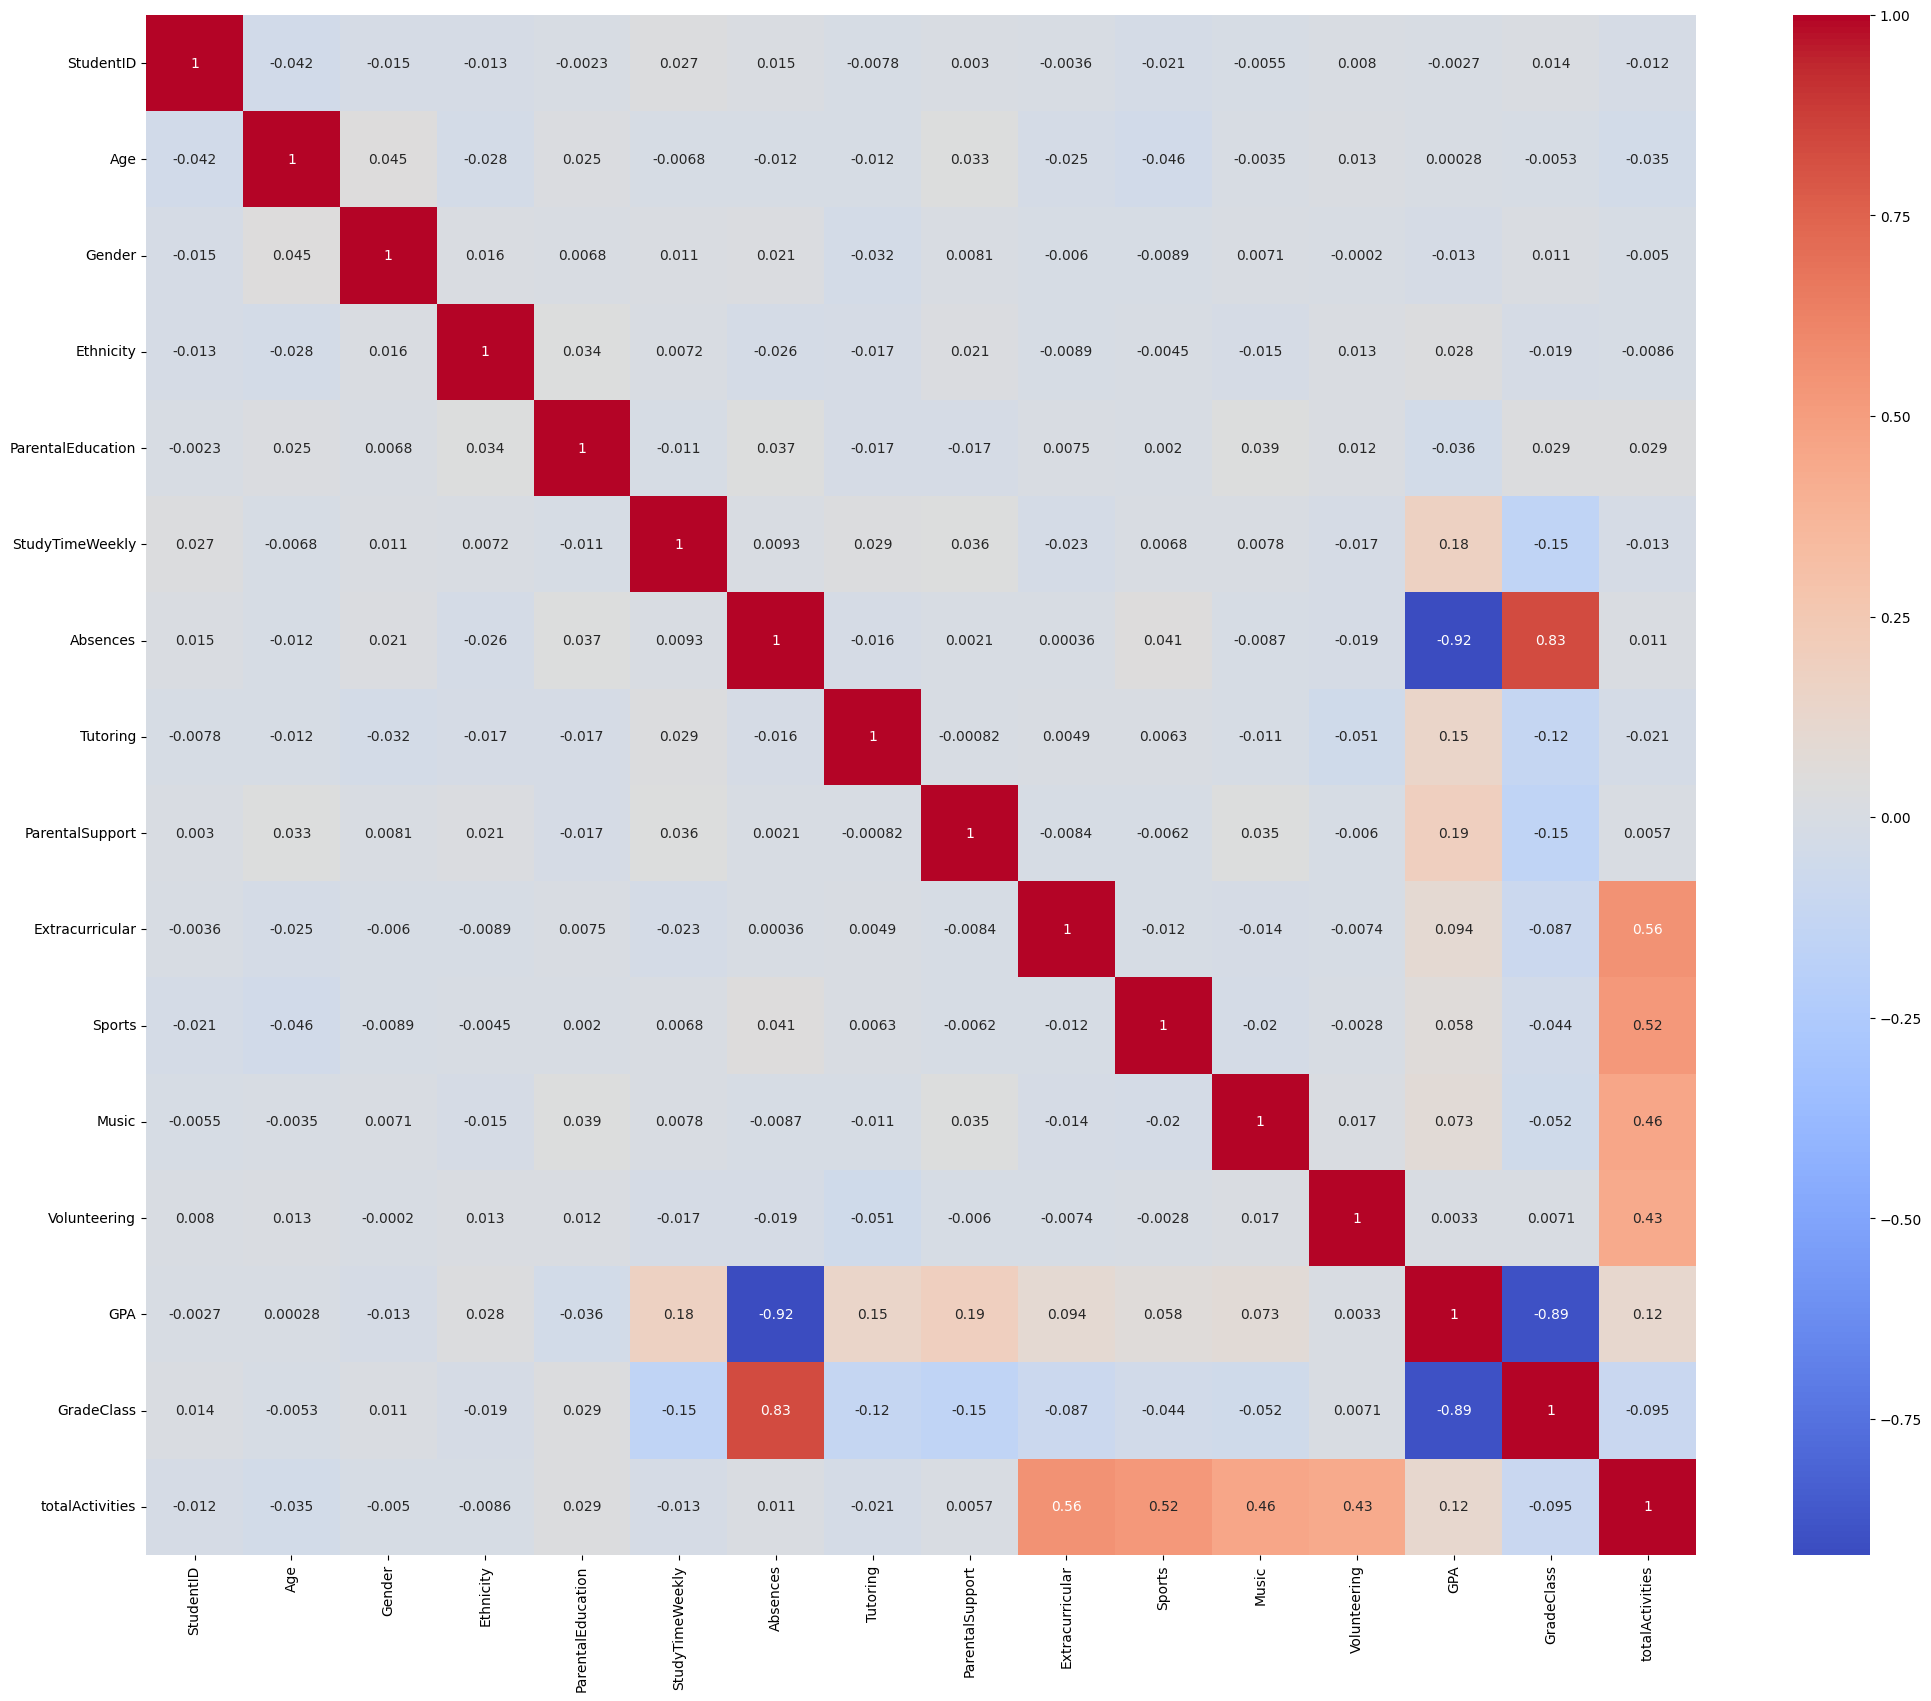

In [243]:
plt.figure(figsize=(25, 20))
sns.heatmap(data_new_grade_class.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

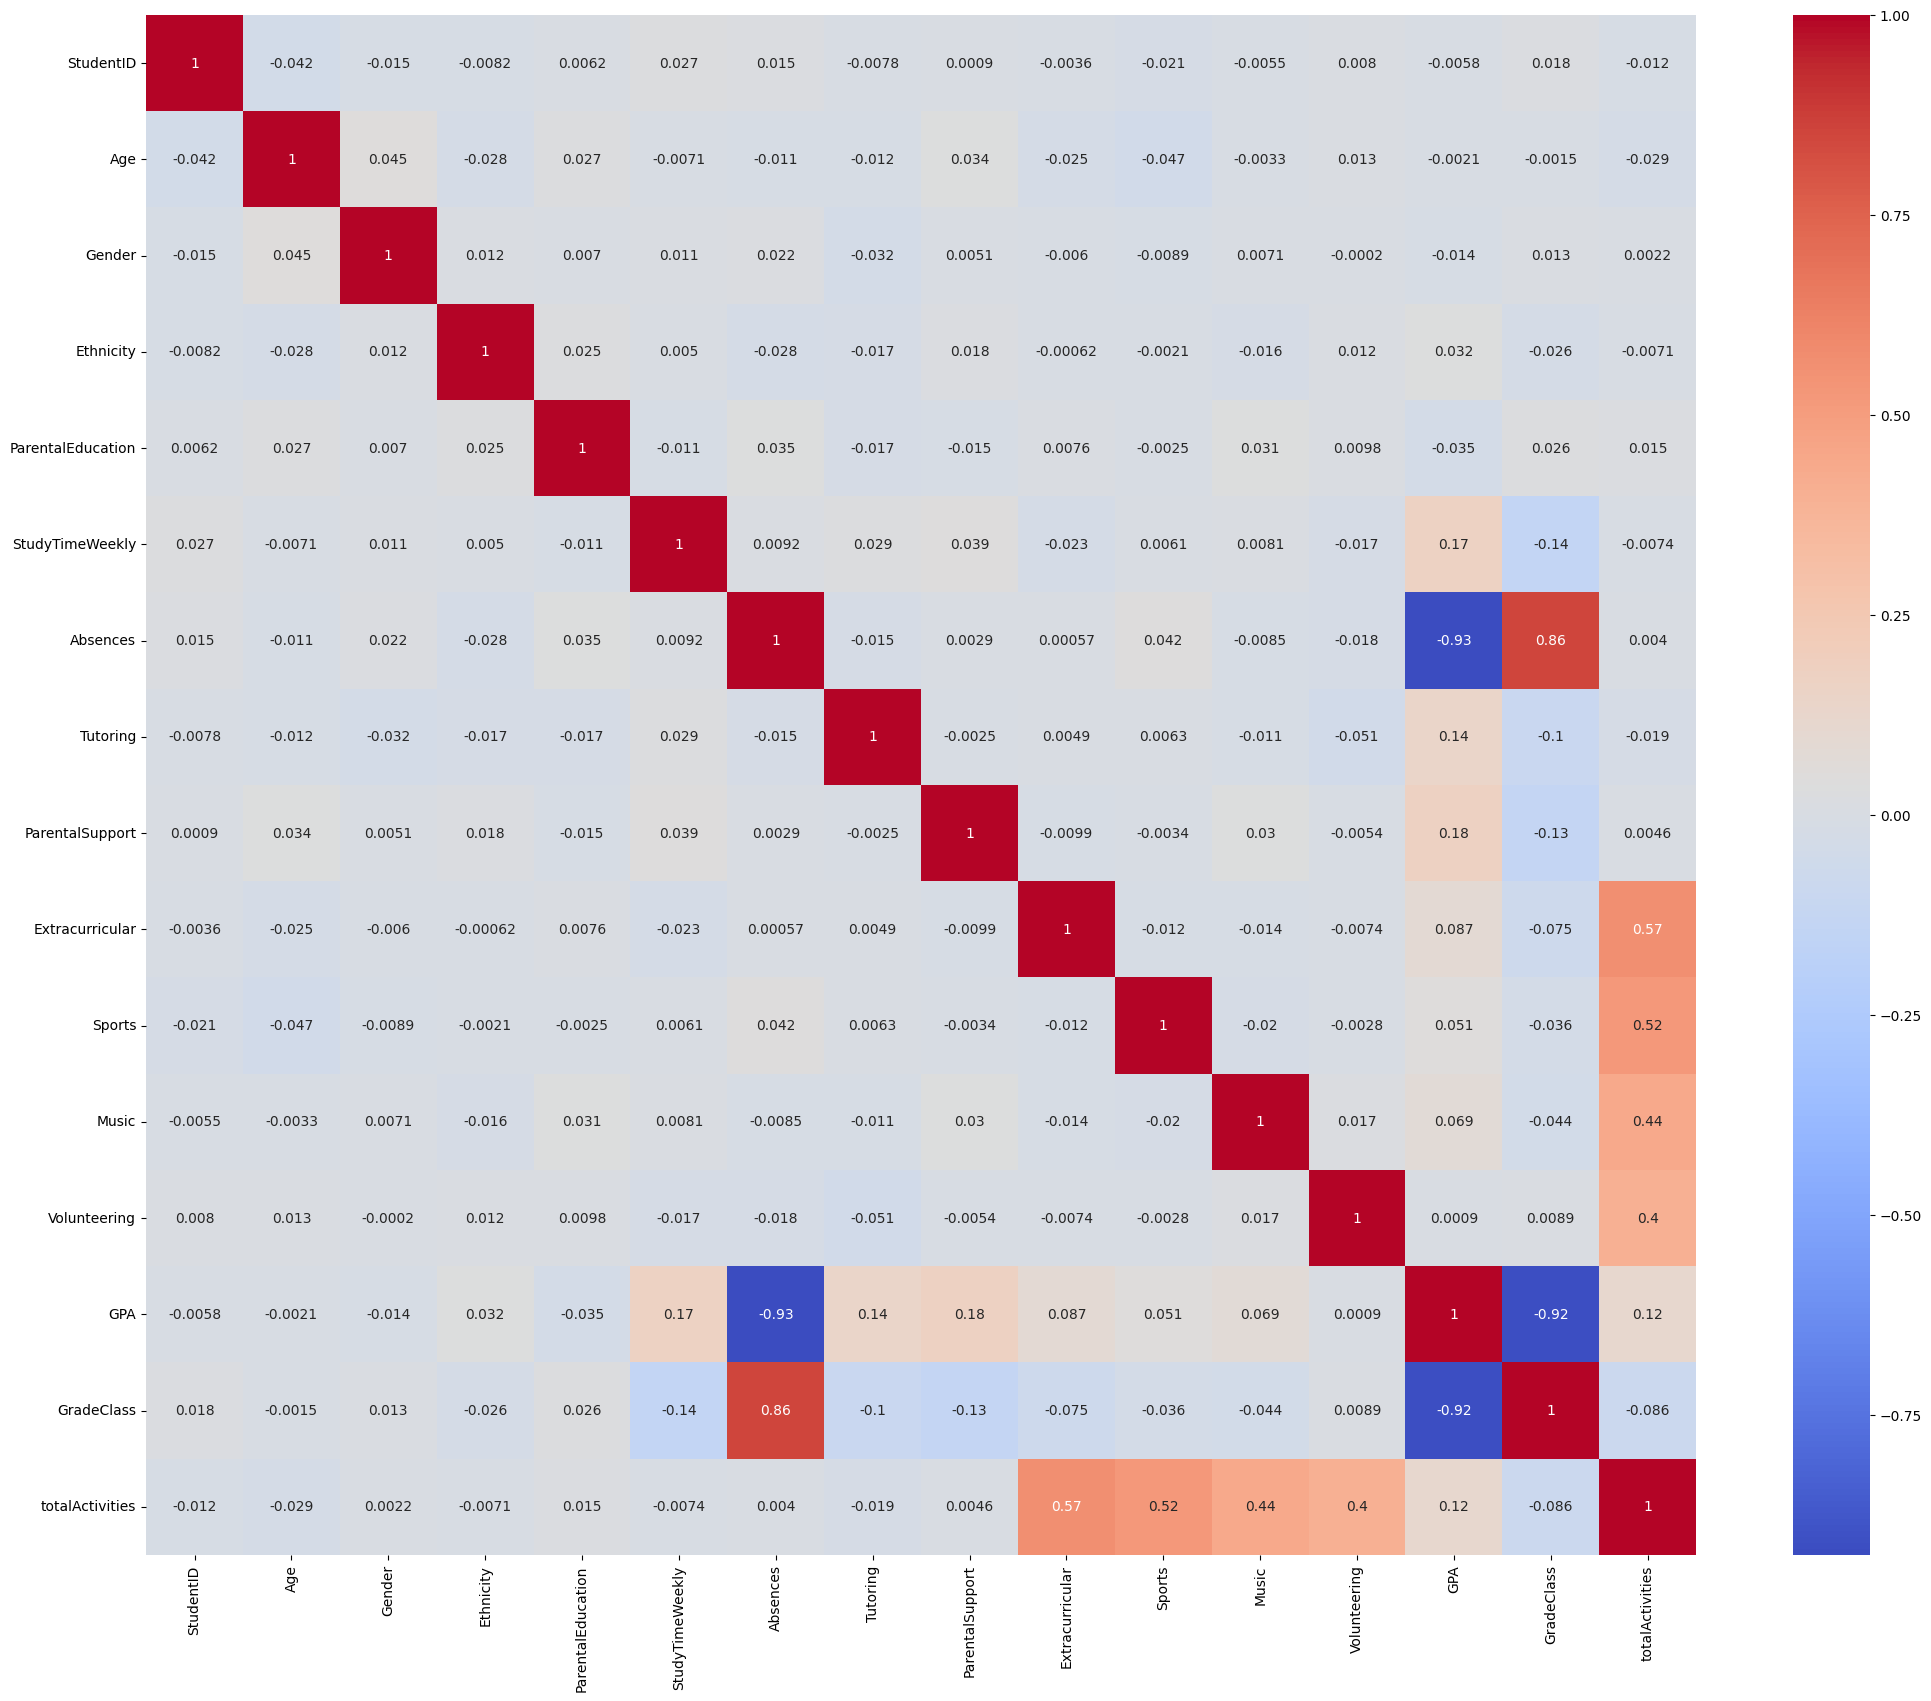

In [244]:
plt.figure(figsize=(25, 20))
sns.heatmap(data_new_grade_class.corr(numeric_only=True, method="spearman"), annot=True,cmap='coolwarm')
plt.show()

<Axes: >

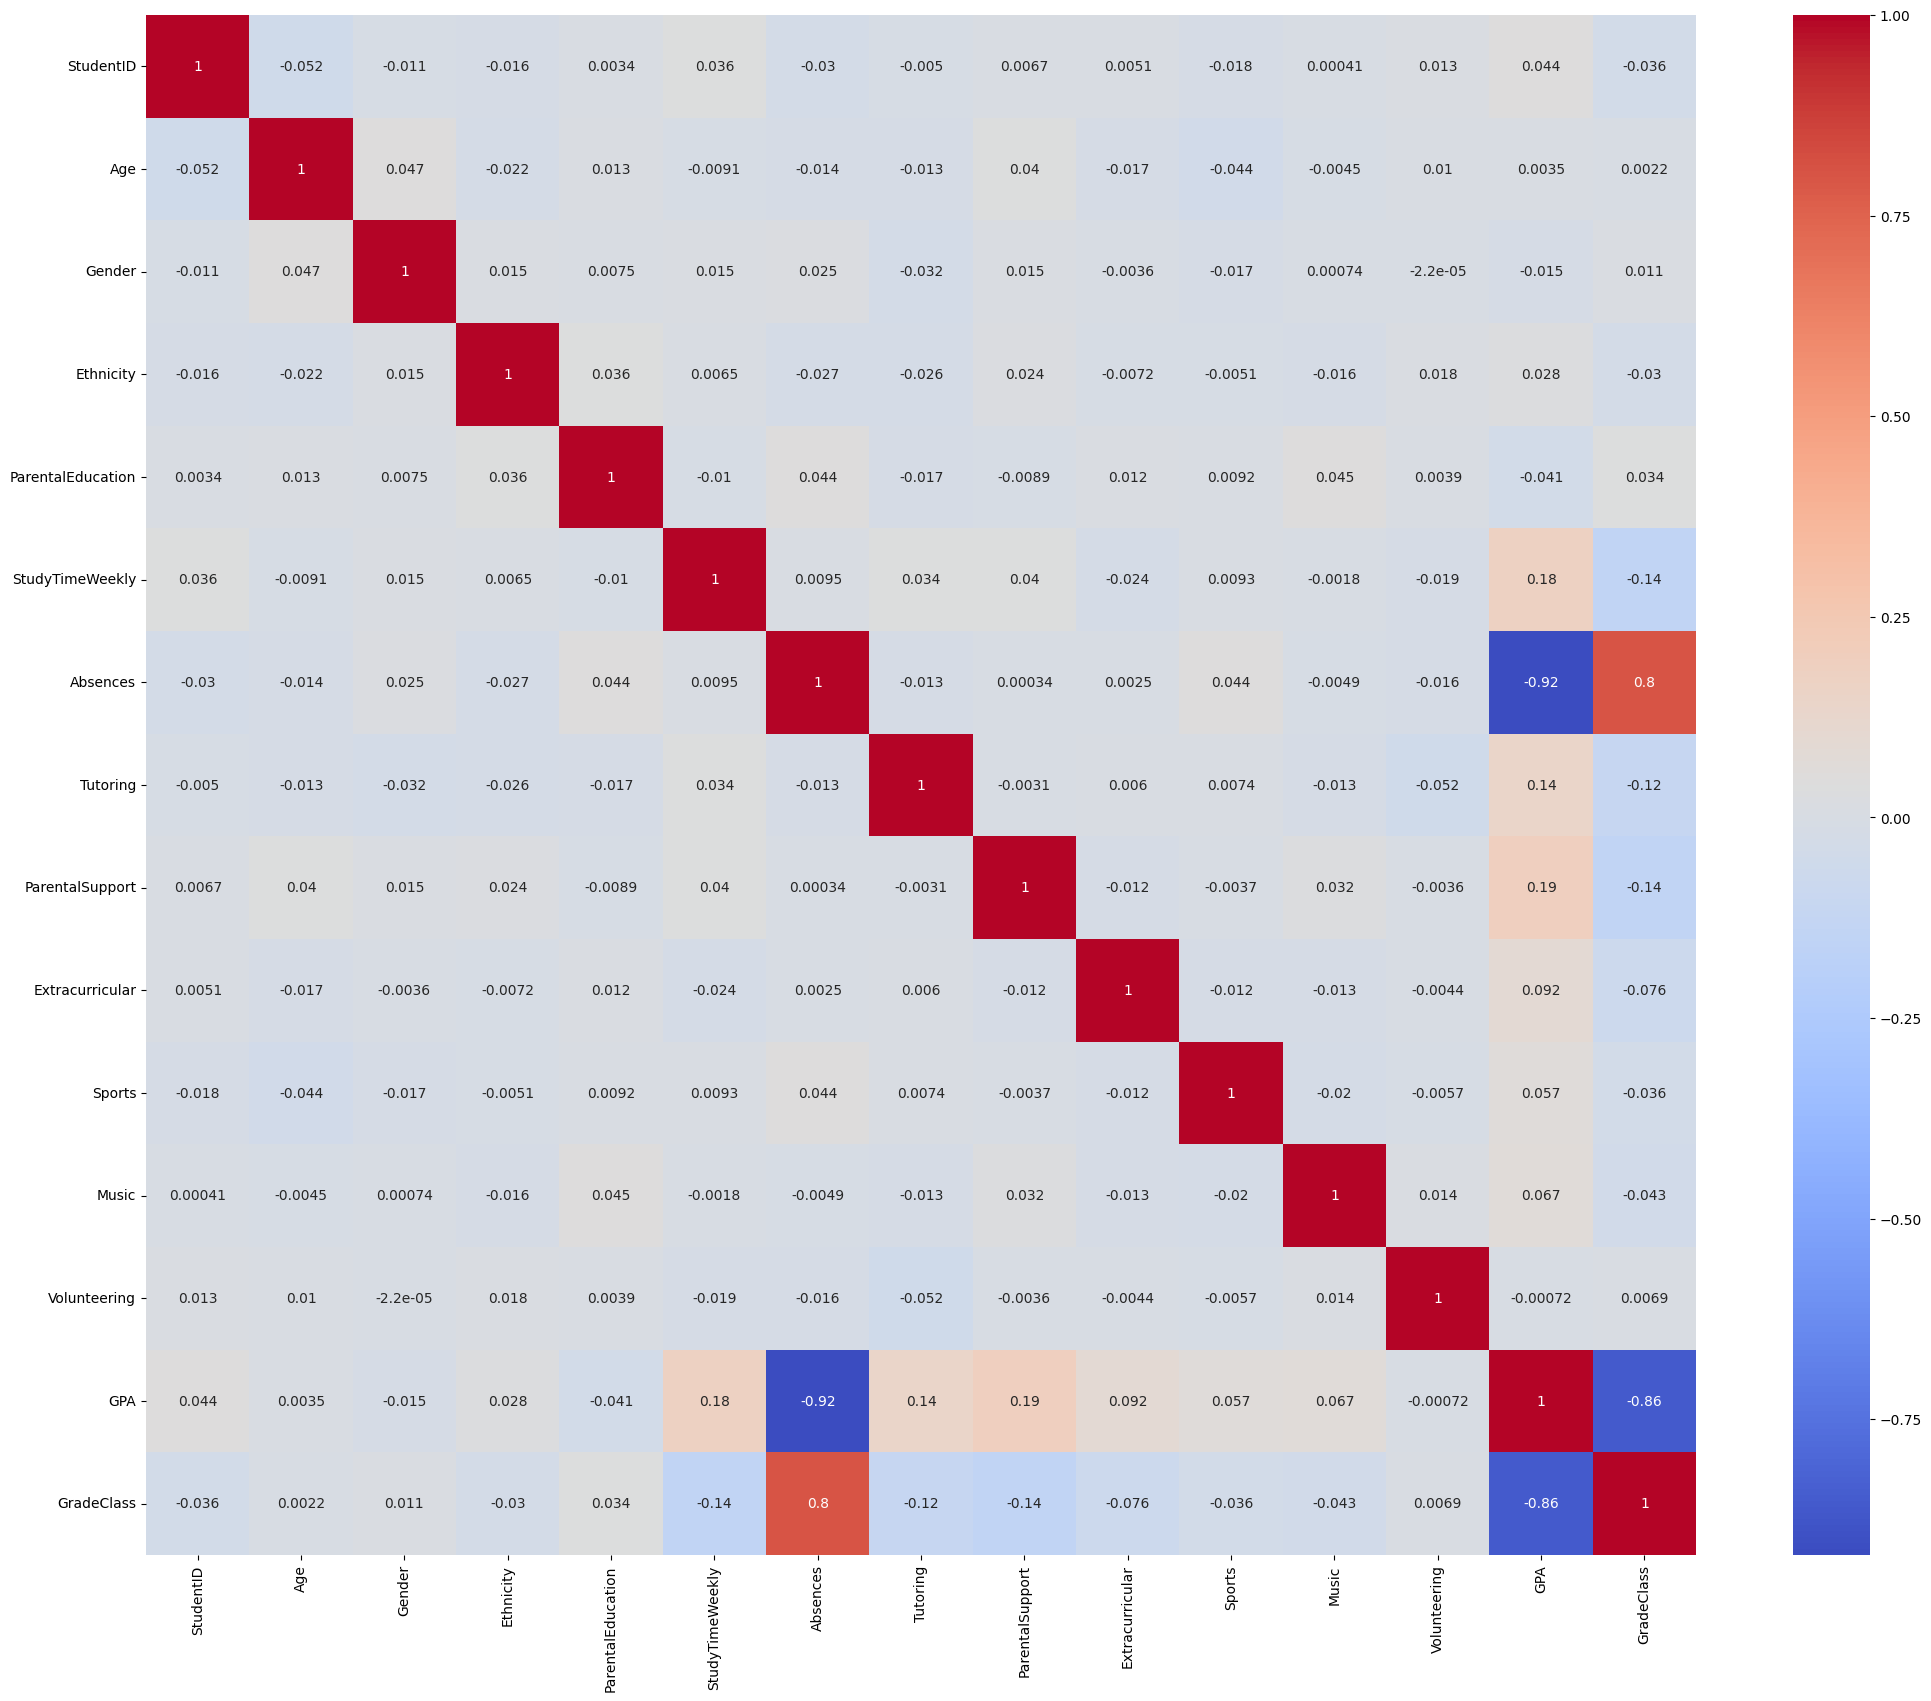

In [245]:
plt.figure(figsize=(25, 20))
sns.heatmap(data_without_old_Grade_class.corr(numeric_only=True), annot=True,cmap='coolwarm')

<Axes: xlabel='Absences', ylabel='GPA'>

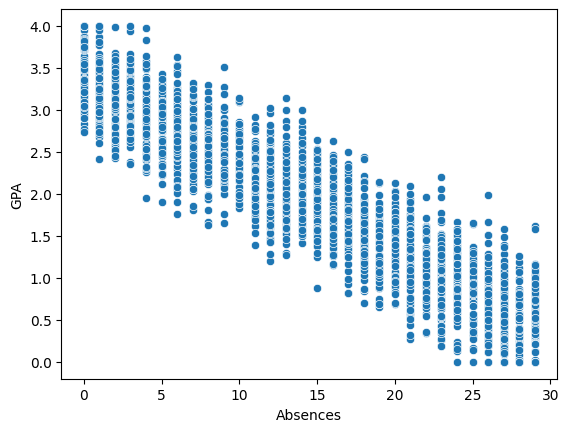

In [246]:
sns.scatterplot(x=data_new_grade_class['Absences'], y=data_new_grade_class['GPA'])

<Axes: xlabel='StudyTimeWeekly', ylabel='GPA'>

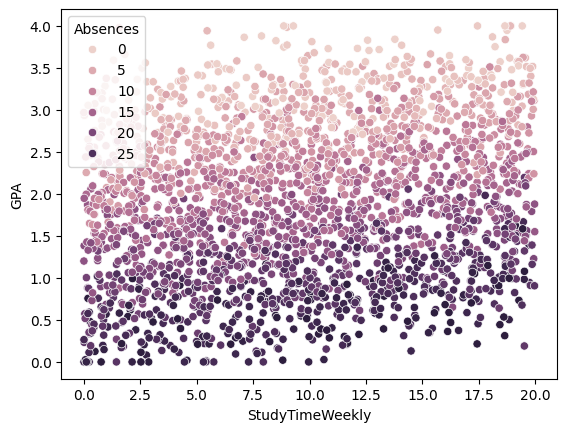

In [247]:
sns.scatterplot(x=data_new_grade_class['StudyTimeWeekly'], y=data_new_grade_class['GPA'], hue=data_new_grade_class['Absences'])

3. PCA (Principal Component Analysis)

In [248]:
data_new_grade_class[data_new_grade_class.select_dtypes(include=['number']).drop(['StudentID', 'GPA'], axis=1).columns]

Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0      17       1          0                  2        19.833723         7   
1      18       0          0                  1        15.408756         0   
2      15       0          2                  3         4.210570        26   
3      17       1          0                  3        10.028829        14   
4      17       1          0                  2         4.672495        17   
...   ...     ...        ...                ...              ...       ...   
2387   18       1          0                  3        10.680555         2   
2388   17       0          0                  1         7.583217         4   
2389   16       1          0                  2         6.805500        20   
2390   16       1          1                  0        12.416653        17   
2391   16       1          0                  2        17.819907        13   

      Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
0            1                2                0       0      1             0   
1            0                1                0       0      0             0   
2            0                2                0       0      0             0   
3            0                3                1       0      0             0   
4            1                3                0       0      0             0   
...        ...              ...              ...     ...    ...           ...   
2387         0                4                1       0      0             0   
2388         1                4                0       1      0             0   
2389         0                2                0       0      0             1   
2390         0                2                0       1      1             0   
2391         0                2                0       0      0             1   

      GradeClass  totalActivities  
0              2                1  
1              1                0  
2              4                0  
3              3                1  
4              4                0  
...          ...              ...  
2387           1                1  
2388           1                1  
2389           4                1  
2390           4                2  
2391           3                1  

[2392 rows x 14 columns]

In [249]:
cls = PCA(n_components=6)
pcs = cls.fit_transform(data_new_grade_class[data_new_grade_class.select_dtypes(include=['number']).drop(['StudentID', 'GPA'], axis=1).columns])
cls.components_

array([[-1.53747398e-03,  1.26103633e-03, -3.13573971e-03,
         4.33424537e-03,  8.01267864e-03,  9.93307775e-01,
        -9.24530221e-04, -1.47653713e-05, -6.22978858e-05,
         2.18001488e-03, -4.34869343e-04, -7.79494802e-04,
         1.15046360e-01,  9.03352845e-04],
       [-1.37311190e-03,  1.00143875e-03,  1.40949970e-03,
        -2.10074104e-03,  9.99361621e-01, -4.07471738e-03,
         2.44040010e-03,  7.60699561e-03, -1.93877039e-03,
         5.52257887e-04,  5.73361154e-04, -1.07719377e-03,
        -3.43148877e-02, -1.89034512e-03],
       [ 5.44946045e-01,  1.65836739e-02,  3.21534536e-03,
         3.15927293e-03, -1.10709336e-02,  1.99349690e-02,
         4.30432181e-03,  8.21580534e-01, -5.37399281e-04,
        -6.45370046e-03,  1.41676358e-02,  5.81495415e-04,
        -1.64018944e-01,  7.75803152e-03],
       [ 8.13888808e-01,  1.73229002e-02, -1.71361121e-01,
         8.99229888e-02,  9.73503281e-03, -1.52359745e-02,
        -1.00893470e-02, -5.11134744e-01, -4.

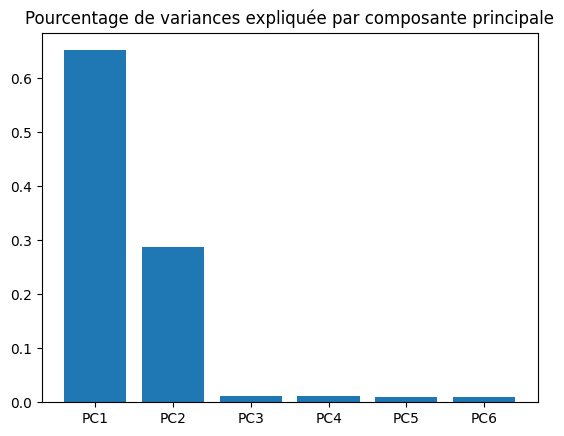

In [250]:
#plt.figure(figsize=(15, 10))
plt.bar(["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"], cls.explained_variance_ratio_)
plt.title("Pourcentage de variances expliquée par composante principale")
plt.show()

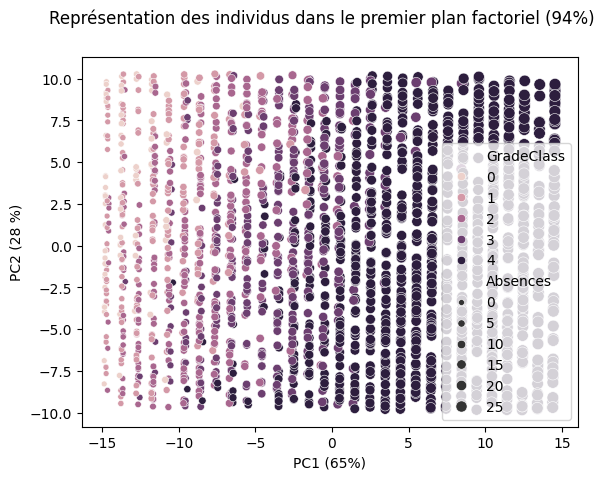

In [251]:
sns.scatterplot(x=pcs[:, 0], y=pcs[:, 1], hue=data_new_grade_class['GradeClass'], size=data_new_grade_class['Absences'])
plt.xlabel("PC1 (65%)") 
plt.ylabel("PC2 (28 %)")
plt.suptitle("Représentation des individus dans le premier plan factoriel (94%)")
plt.show()

In [252]:
import numpy as np
eig = pd.DataFrame(
    {
        "Composante Principale" : ["PC" + str(x + 1) for x in range(6)], 
        "Variance expliquée" : cls.explained_variance_,
        "% variance expliquée" : np.round(cls.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(cls.explained_variance_ratio_) * 100)
    }
)
eig

Composante Principale  Variance expliquée  % variance expliquée  \
0                   PC1           72.660676                  65.0   
1                   PC2           31.989400                  29.0   
2                   PC3            1.325513                   1.0   
3                   PC4            1.254848                   1.0   
4                   PC5            1.072032                   1.0   
5                   PC6            0.994993                   1.0   

   % cum. var. expliquée  
0                   65.0  
1                   94.0  
2                   95.0  
3                   96.0  
4                   97.0  
5                   98.0

In [253]:

data1_pca = data_new_grade_class.drop(columns=['StudentID','GPA'])
n_comp = cls.components_.shape[0]
n = data1_pca.shape[0] # nb individus
p = data1_pca.shape[1] # nb variables
print(n)
print(p)
eigval = (n-1) / n * cls.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,n_comp)) # matrice vide pour avoir les coordonnées
for k in range(n_comp):
    corvar[:,k] = cls.components_[k,:] * sqrt_eigval[k]
coordvar = pd.DataFrame({'id': data1_pca.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar


2392
14


id     COR_1     COR_2
0                 Age -0.013103 -0.007765
1              Gender  0.010747  0.005663
2           Ethnicity -0.026724  0.007970
3   ParentalEducation  0.036938 -0.011879
4     StudyTimeWeekly  0.068287  5.651125
5            Absences  8.465308 -0.023041
6            Tutoring -0.007879  0.013800
7     ParentalSupport -0.000126  0.043016
8     Extracurricular -0.000531 -0.010963
9              Sports  0.018579  0.003123
10              Music -0.003706  0.003242
11       Volunteering -0.006643 -0.006091
12         GradeClass  0.980464 -0.194042
13    totalActivities  0.007699 -0.010689

PC1 : negative for the Absences variable. 
PC2 : positive for the StudyTimeWeekly variable. 
PC3 : positive for the Age and Parental Support variables. 

4. AHC (Ascending Hierarchical Classification)

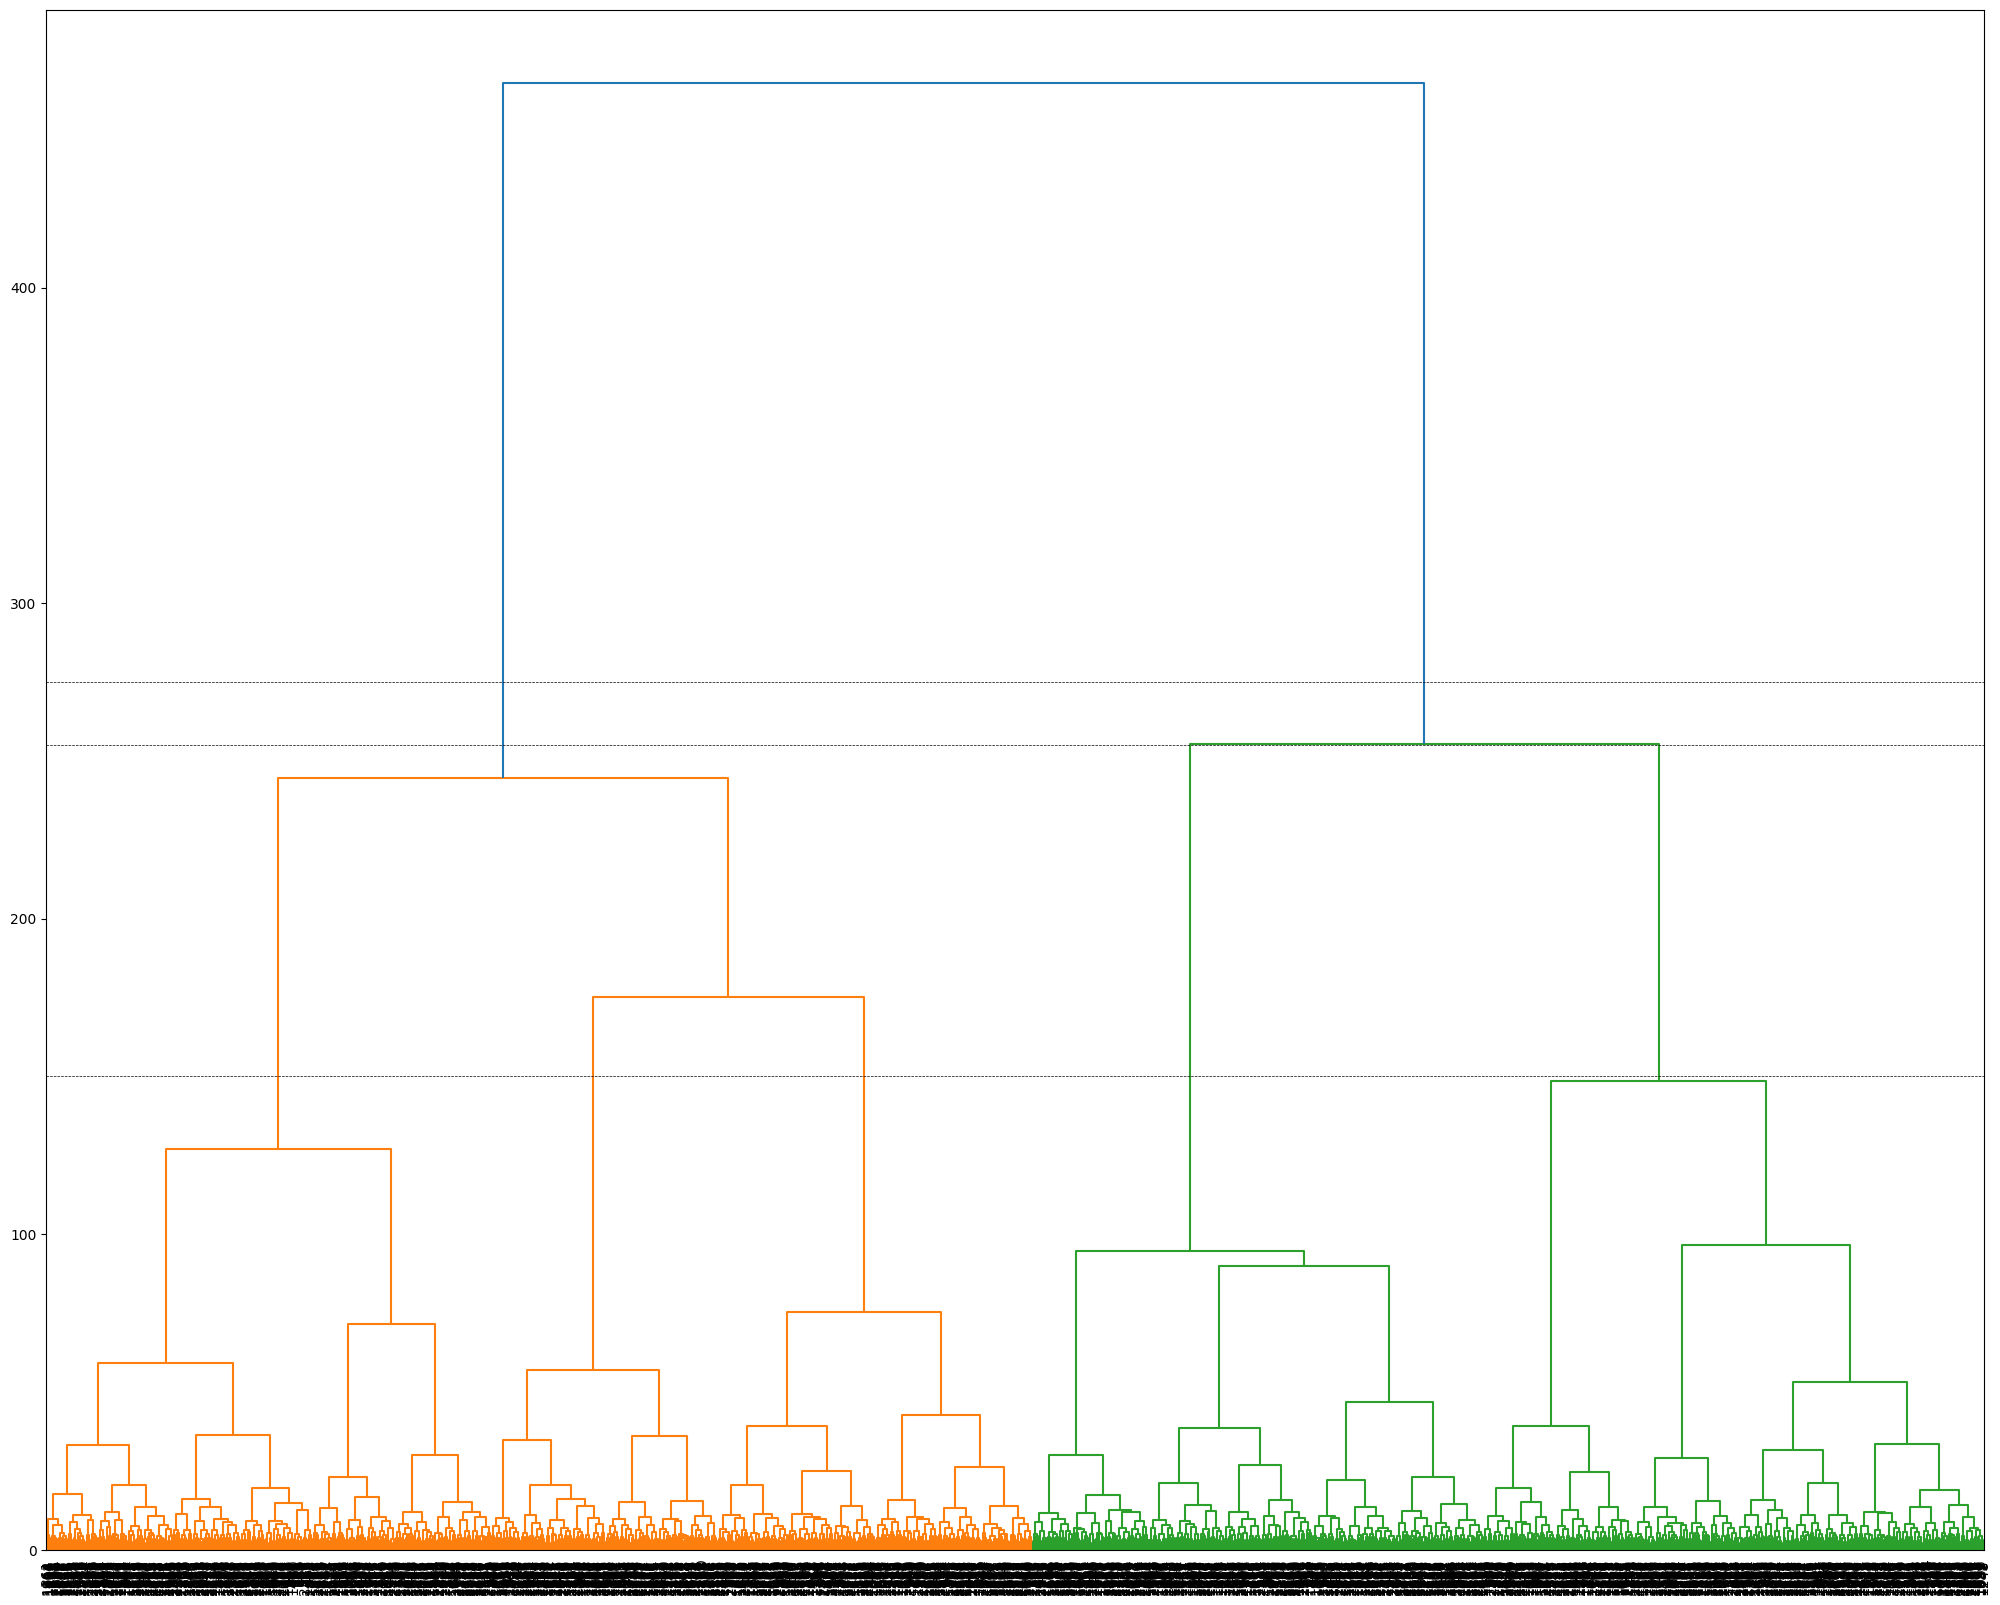

In [254]:
data_cah = data_new_grade_class.drop(['StudentID','GradeClass','GPA'], axis=1)
num_col = data_new_grade_class.select_dtypes(include=['number']).drop(['StudentID','GradeClass'], axis=1).columns
cls = AgglomerativeClustering(n_clusters=None,linkage='ward', distance_threshold=0)
cah = cls.fit(data_cah)
plt.figure(figsize=(25, 20),facecolor='white')
plot_dendrogram(cls, labels=data_cah.index)
plt.axhline(y = 275, linewidth = .5, color = "black", linestyle = "--")
plt.axhline(y = 255, linewidth = .5, color = "black", linestyle = "--")
plt.axhline(y = 150, linewidth = .5, color = "black", linestyle = "--")
#plt.savefig("dendogram.png", bbox_inches='tight', transparent=True)
#plt.style.use('default')
plt.show()

In [255]:
counts = np.zeros(cah.children_.shape[0])
n_samples = len(cah.labels_)
for i, merge in enumerate(cah.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # noeud feuille
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([cah.children_, cah.distances_, counts]).astype(float)

In [256]:
labels_2_classes = fcluster(linkage_matrix, t=275, criterion='distance')
labels_3_classes = fcluster(linkage_matrix, t=255, criterion='distance')
labels_5_classes = fcluster(linkage_matrix, t=150, criterion='distance')

In [257]:
data_cah['Class_2'] = labels_2_classes
data_cah['Class_3'] = labels_3_classes
data_cah['Class_5'] = labels_5_classes

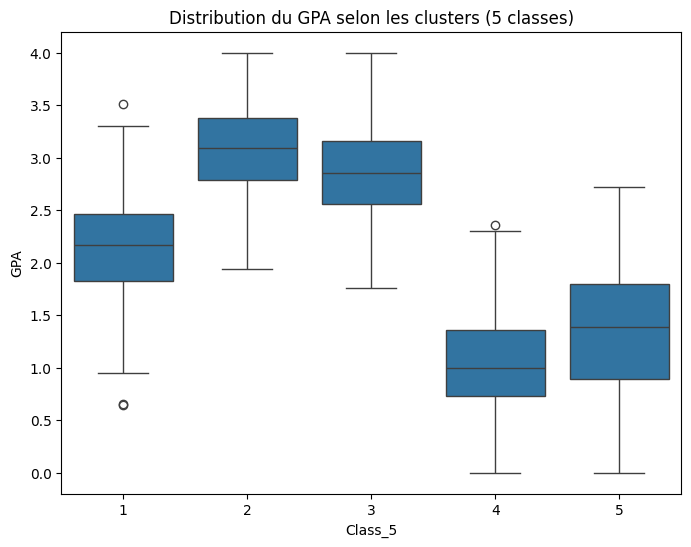

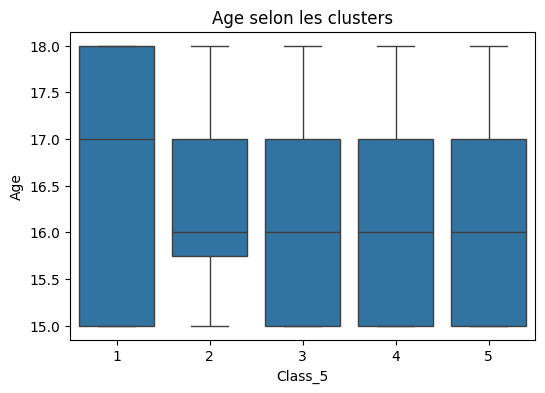

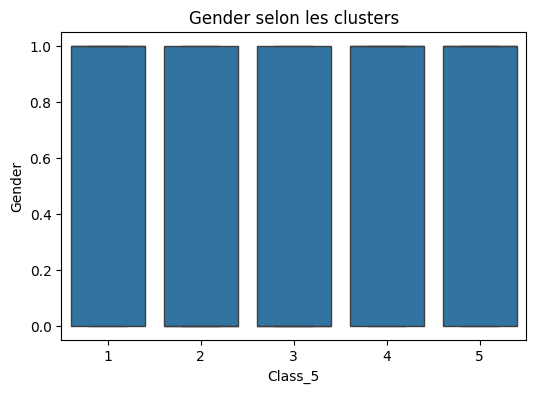

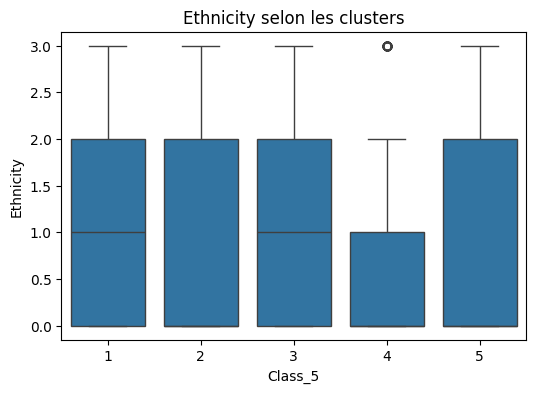

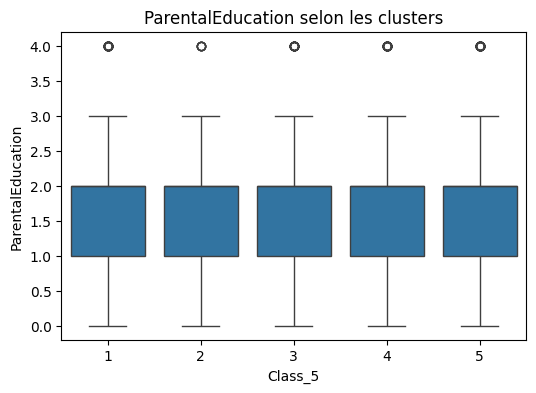

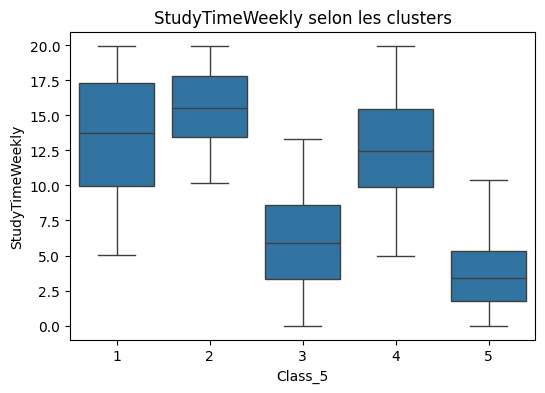

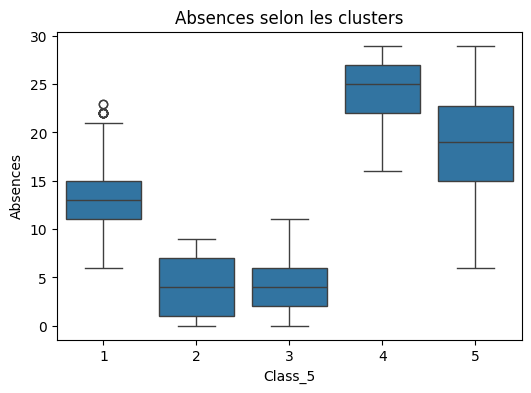

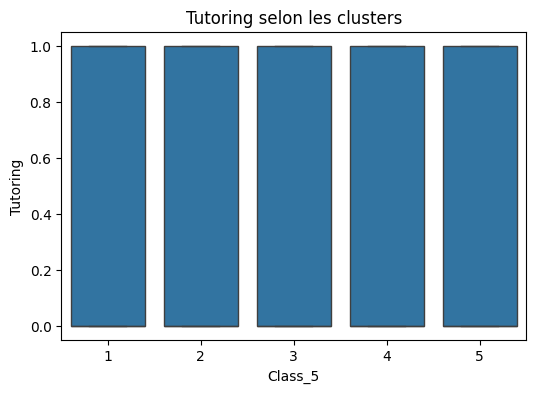

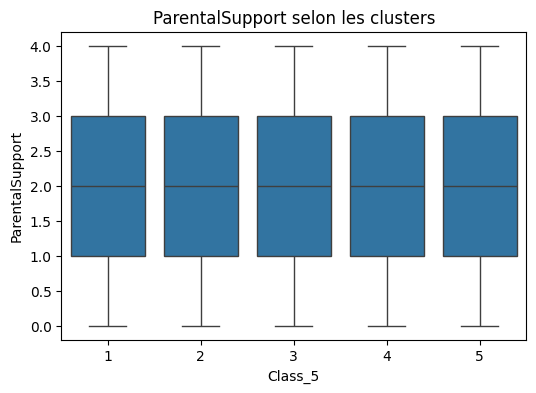

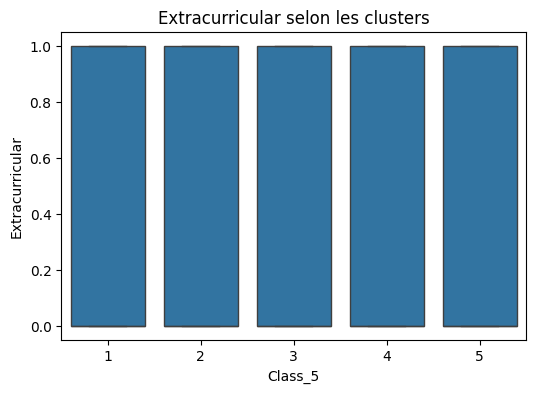

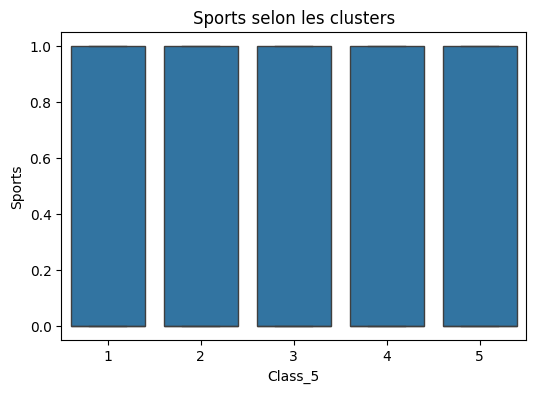

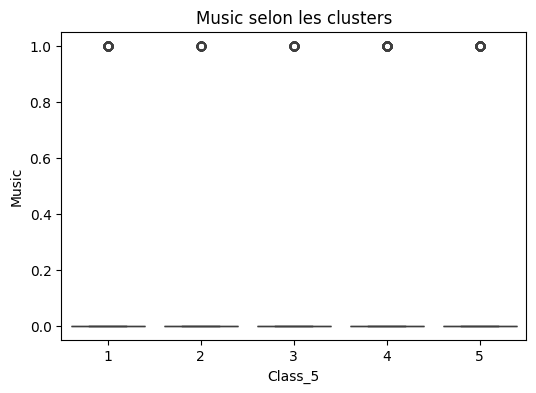

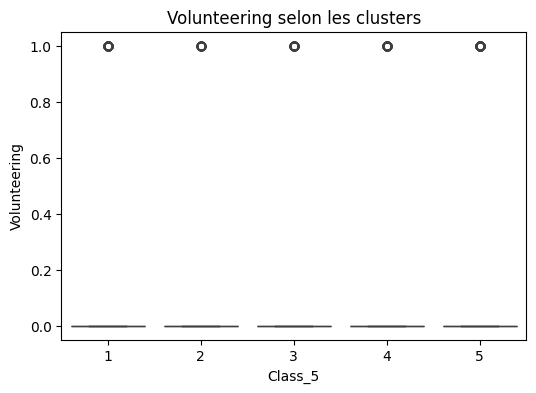

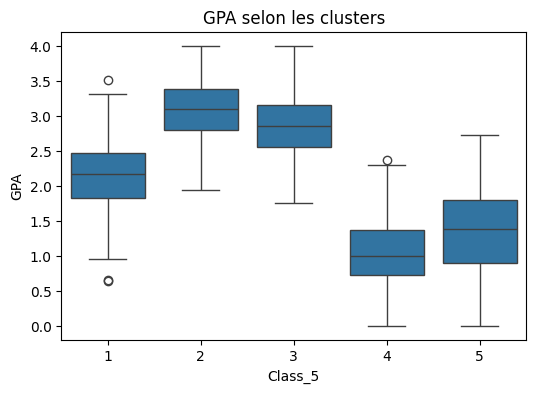

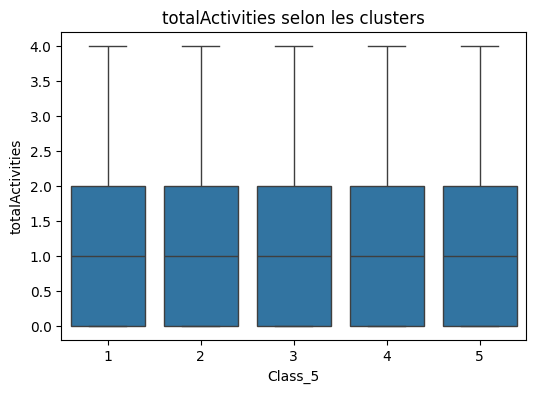

In [258]:
data_cah['GPA'] = data_new_grade_class['GPA'].values

# Visualisation des distributions de GPA par cluster (pour Class_5 par exemple)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class_5', y='GPA', data=data_cah)
plt.title('Distribution du GPA selon les clusters (5 classes)')
plt.show()

# Visualisation des autres variables numériques par cluster (Class_5)
for var in num_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Class_5', y=var, data=data_cah)
    plt.title(f'{var} selon les clusters')
    plt.show()

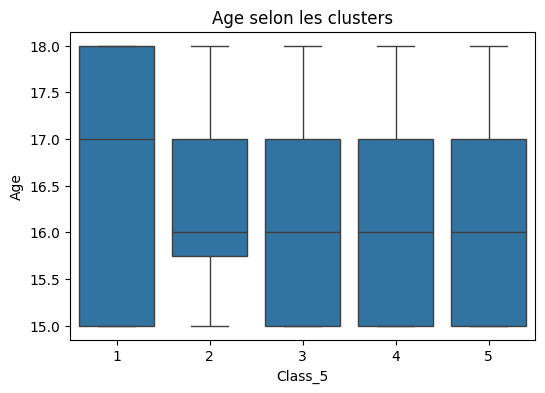

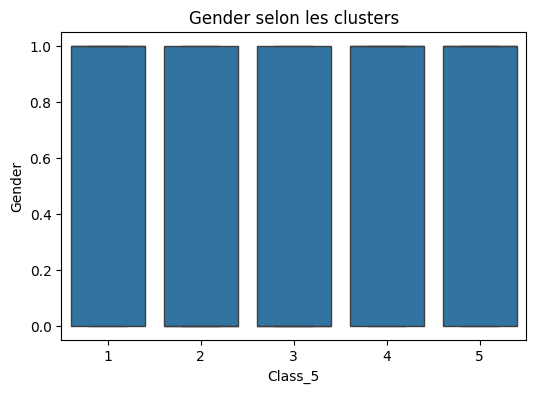

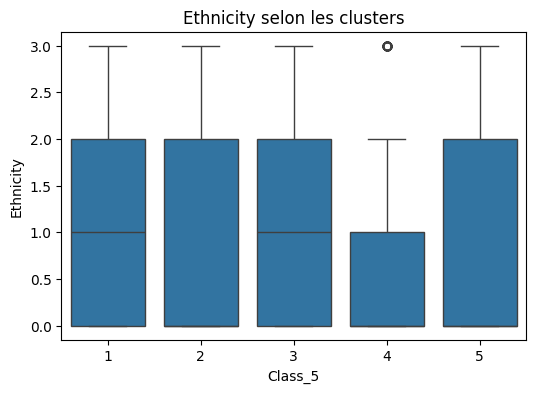

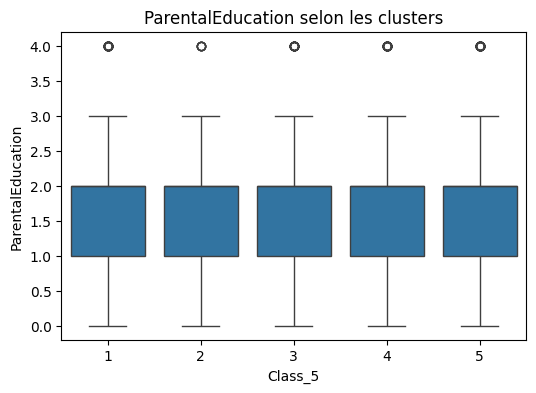

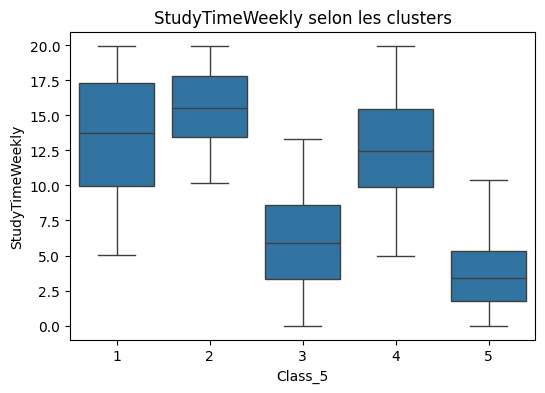

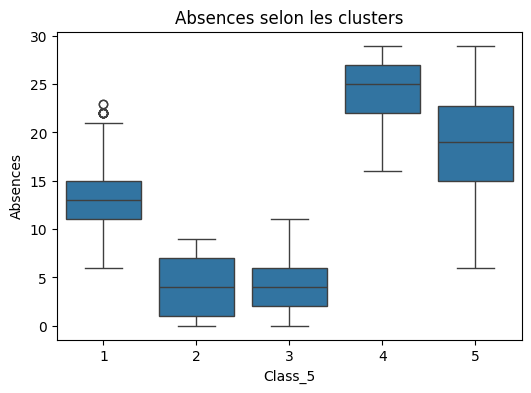

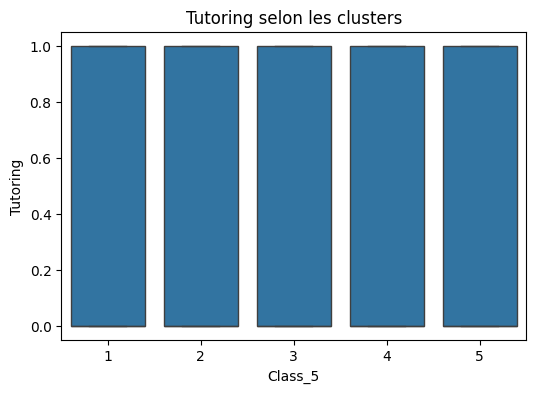

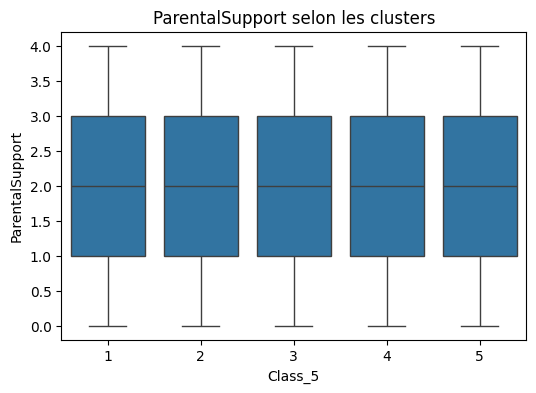

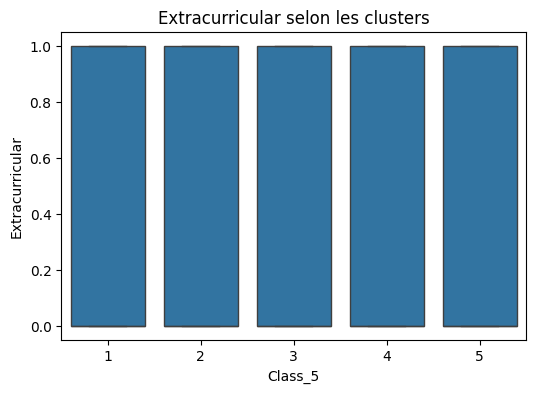

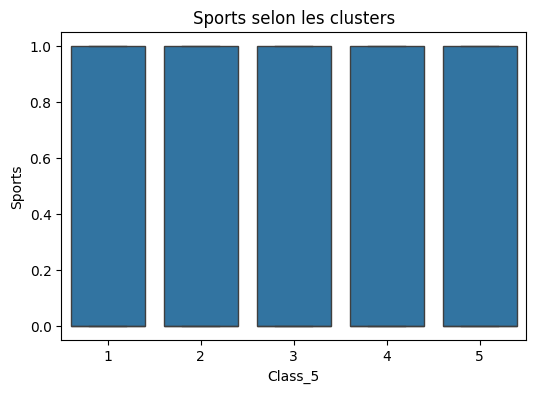

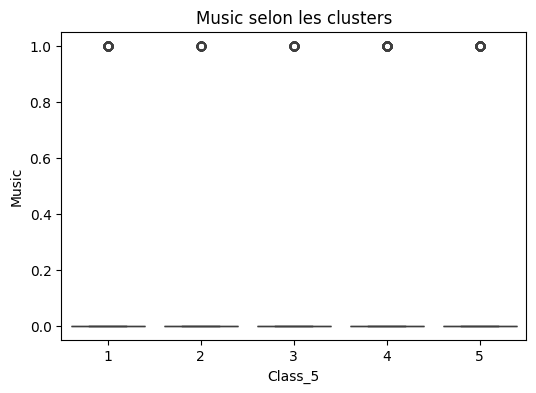

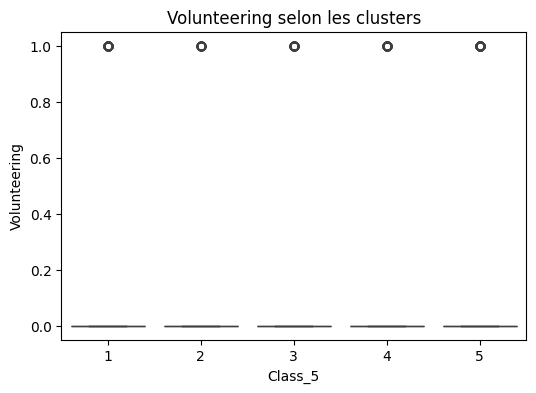

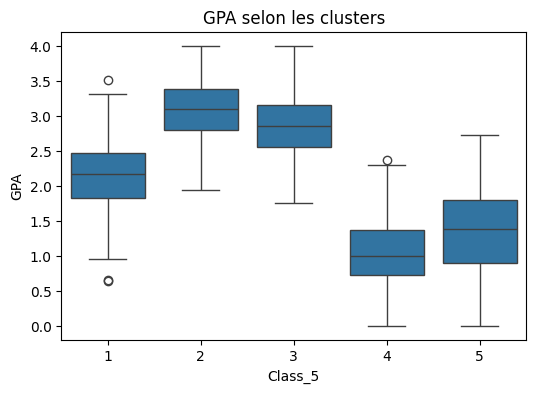

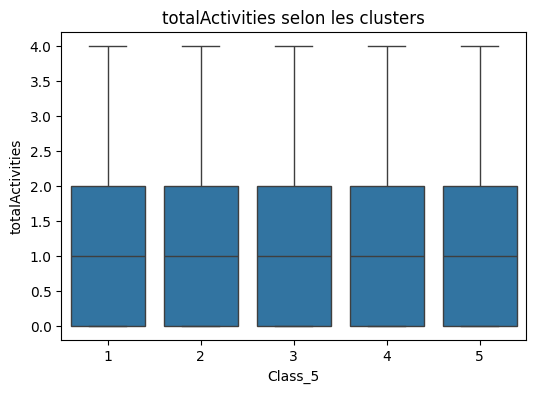

In [259]:
for var in num_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Class_5', y=var, data=data_cah)
    plt.title(f'{var} selon les clusters')
    plt.show()


5. K-means

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   int64  
 14  totalActivities    2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 KB


c:\Users\romal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


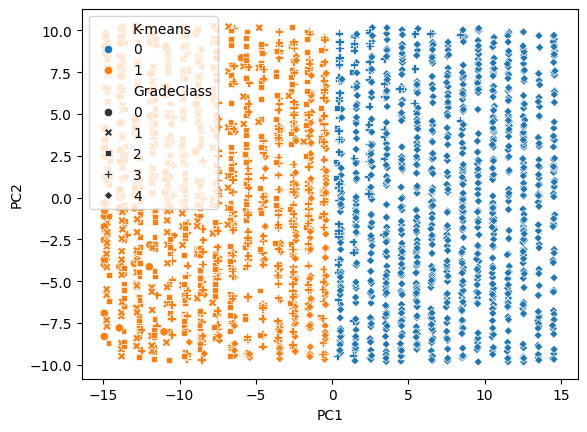

c:\Users\romal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


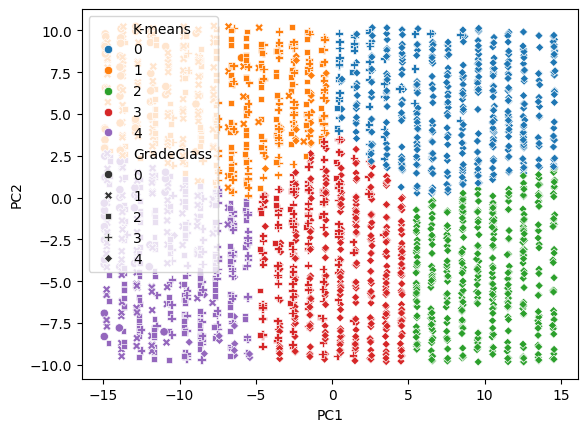

c:\Users\romal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


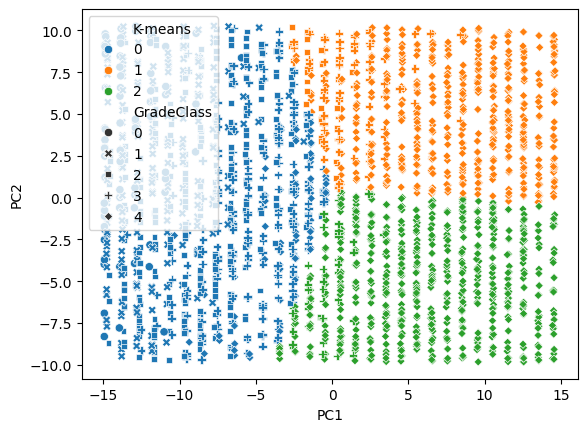

In [260]:
#### K-means test / Always the same classes for 2, very similar for 5

data_init = data_new_grade_class[numeric_columns_new]
data_KMeans = data_new_grade_class[numeric_columns_new]
#data_KMeans = data_new_grade_class[numeric_columns_new].drop(columns=["GradeClass"])

data_KMeans.info()

from sklearn.cluster import KMeans

# 2 groups (pass/fail) or 5 (grades : A,B,C,D,F)
cls2 = KMeans(n_clusters=2, init="random")
cls2.fit(data_KMeans)
labels = pd.Series(cls2.labels_, name="K-means")
scatterplot_pca(data = data_KMeans, hue=labels, style = data_KMeans.GradeClass)
plt.show()

cls5 = KMeans(n_clusters=5, init="random")
cls5.fit(data_KMeans)
labels2 = pd.Series(cls5.labels_, name="K-means")
scatterplot_pca(data = data_KMeans, hue=labels2, style = data_KMeans.GradeClass)
plt.show()

cls3 = KMeans(n_clusters=3, init="random")
cls3.fit(data_KMeans)
labels3 = pd.Series(cls3.labels_, name="K-means")
scatterplot_pca(data = data_KMeans, hue=labels3, style = data_KMeans.GradeClass)
plt.show()

c:\Users\romal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


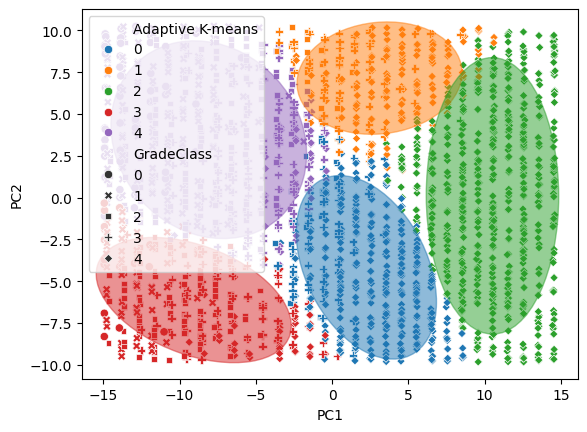

c:\Users\romal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


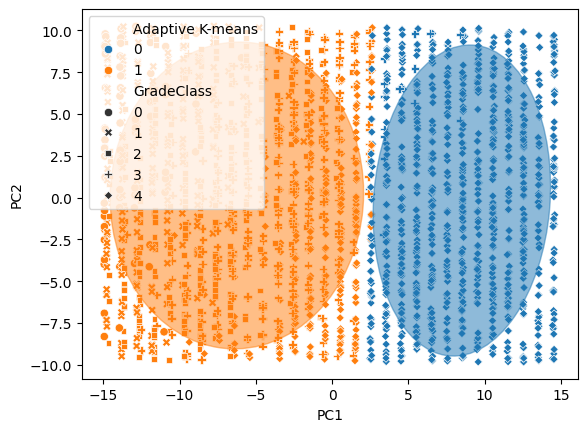

c:\Users\romal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


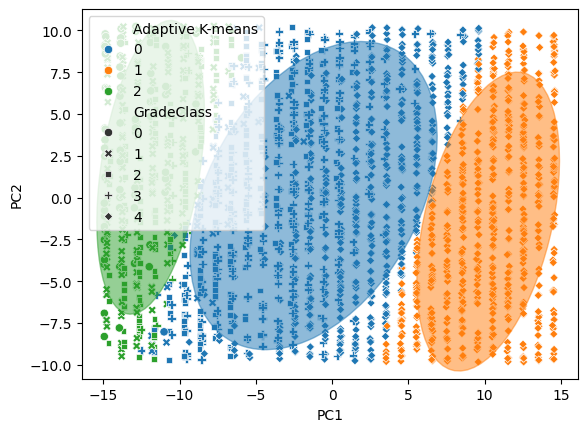

In [261]:
##### Adaptative K-means / Gives random classes

from sklearn.metrics import adjusted_rand_score
exec(open('functions sy09/adaptive_kmeans.py').read())

data_Adapt_KMeans = data_new_grade_class[numeric_columns_new]
#data_Adapt_KMeans.info()

cls_adapt_5 = AdaptiveKMeans(n_clusters=5)
labels = cls_adapt_5.fit_predict(data_Adapt_KMeans.to_numpy())
s1a = adjusted_rand_score(data_Adapt_KMeans.GradeClass, labels)

labels = pd.Series(labels, name="Adaptive K-means")

plot_clustering(data_Adapt_KMeans, clus1=labels, clus2=data_Adapt_KMeans.GradeClass, centers=cls_adapt_5.cluster_centers_, covars=cls_adapt_5.covars_)
plt.show()

cls_adapt_2 = AdaptiveKMeans(n_clusters=2)
labels2 = cls_adapt_2.fit_predict(data_Adapt_KMeans.to_numpy())
s2a = adjusted_rand_score(data_Adapt_KMeans.GradeClass, labels2)

labels2 = pd.Series(labels2, name="Adaptive K-means")

plot_clustering(data_Adapt_KMeans, clus1=labels2, clus2=data_Adapt_KMeans.GradeClass, centers=cls_adapt_2.cluster_centers_, covars=cls_adapt_2.covars_)
plt.show()

cls_adapt_3 = AdaptiveKMeans(n_clusters=3)
labels3 = cls_adapt_3.fit_predict(data_Adapt_KMeans.to_numpy())
s3a = adjusted_rand_score(data_Adapt_KMeans.GradeClass, labels3)

labels3 = pd.Series(labels3, name="Adaptive K-means")

plot_clustering(data_Adapt_KMeans, clus1=labels3, clus2=data_Adapt_KMeans.GradeClass, centers=cls_adapt_3.cluster_centers_, covars=cls_adapt_3.covars_)
plt.show()


c:\Users\romal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


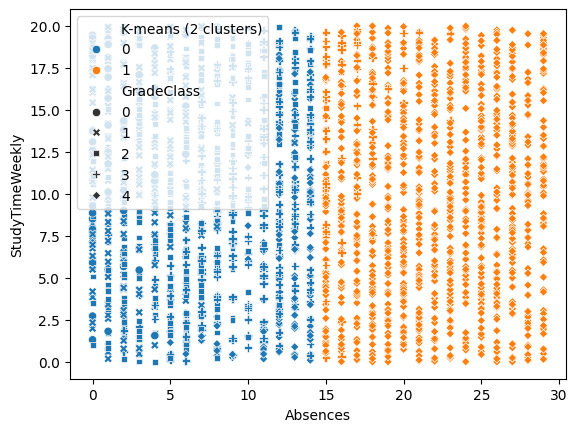

c:\Users\romal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


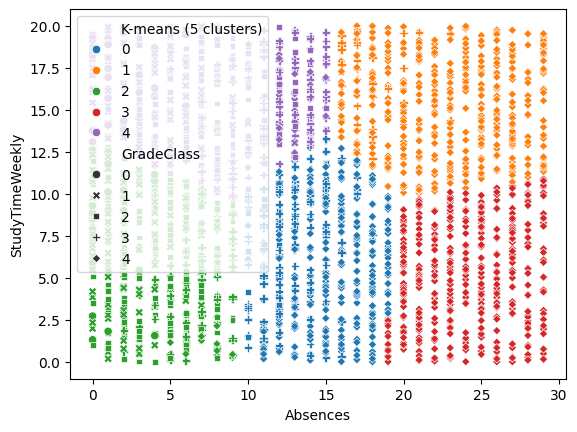

In [262]:
##### Tries with other axis (Absences, StudyTimeWeekly) : always done according to the PCA

data_KMeans_Test = data_new_grade_class[['Absences', 'StudyTimeWeekly']]


# 2 clusters
cls2 = KMeans(n_clusters=2, init="random", random_state=42)
cls2.fit(data_KMeans_Test)
labels2 = pd.Series(cls2.labels_, name="K-means (2 clusters)")
plot_clustering(data=data_KMeans_Test, clus1=labels2, clus2=data_new_grade_class['GradeClass'])
plt.show()

# 5 clusters
cls5 = KMeans(n_clusters=5, init="random", random_state=42)
cls5.fit(data_KMeans_Test)
labels5 = pd.Series(cls5.labels_, name="K-means (5 clusters)")
scatterplot_pca(data=data_KMeans_Test, hue=labels5, style=data_new_grade_class['GradeClass'])
plt.show()

In [263]:
### Graphs to see if we can distinguish classes

data_tmp = data_new_grade_class[numeric_columns_new]
data_tmp.info()


import plotly.express as px

# Assuming data_tmp is already defined and loaded
numeric_columns = [col for col in data_tmp.columns if col != 'GradeClass']

# Generate individual scatter plots
fig = px.scatter_matrix(
    data_tmp,
    dimensions=numeric_columns,
    color="GradeClass",
    title="Scatter Matrix of Student Performance",
    labels={col: col.replace('_', ' ') for col in numeric_columns},
    height=1000,
    width=1000
)
fig.update_layout(showlegend=True)
fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   int64  
 14  totalActivities    2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 KB


In [264]:
fig = px.scatter(
    data_tmp,
    x="Absences",
    y="StudyTimeWeekly",
    color="GradeClass",
    title="Absences vs Study Time Weekly",
    labels={"Absences": "Absences", "StudyTimeWeekly": "Study Time Weekly (hours)"},
    height=700,
    width=900
)
fig.update_layout(showlegend=True)
fig.show()

c:\Users\romal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.



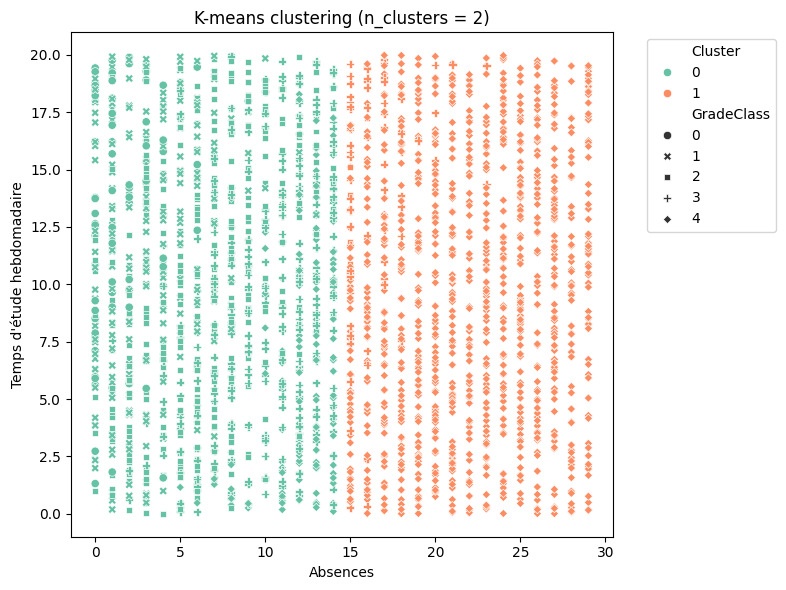

c:\Users\romal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.



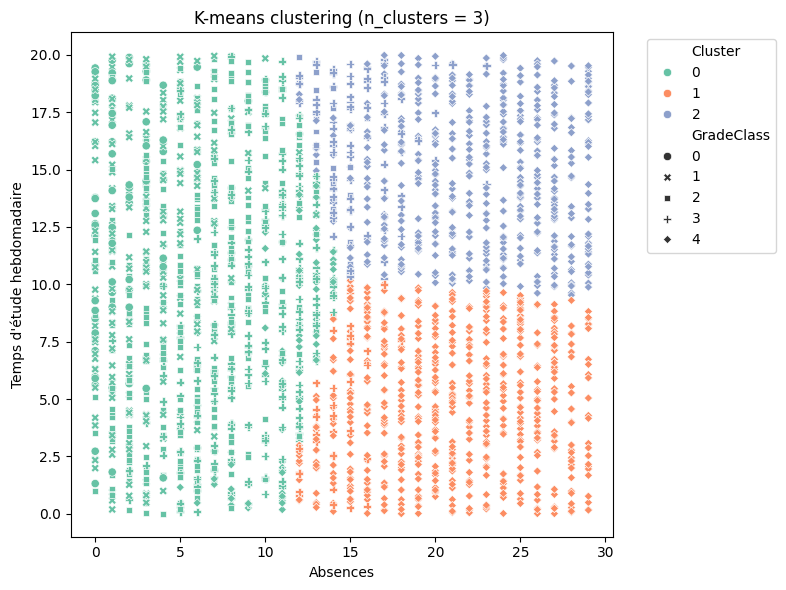

c:\Users\romal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.



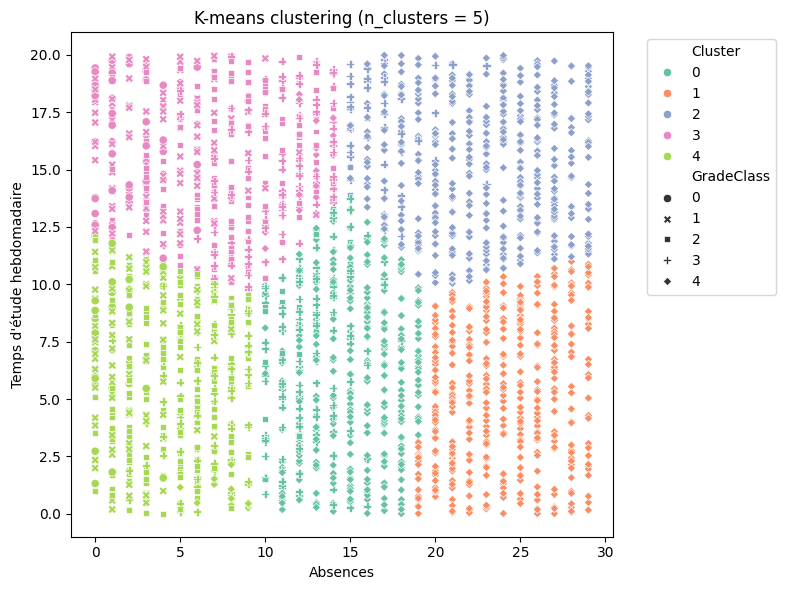

In [265]:
features = ["Absences", "StudyTimeWeekly"]
data_subset = data_new_grade_class[features].dropna()

grade_class = data_new_grade_class.loc[data_subset.index, "GradeClass"]

def plot_kmeans(data, n_clusters, grade_class):
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
    kmeans.fit(data)
    labels = pd.Series(kmeans.labels_, name="Cluster")

    data_plot = data.copy()
    data_plot["Cluster"] = labels
    data_plot["GradeClass"] = grade_class

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=data_plot,
        x="Absences",
        y="StudyTimeWeekly",
        hue="Cluster",
        style="GradeClass",
        palette="Set2"
    )
    plt.title(f"K-means clustering (n_clusters = {n_clusters})")
    plt.xlabel("Absences")
    plt.ylabel("Temps d'étude hebdomadaire")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_kmeans(data_subset, n_clusters=2, grade_class=grade_class)
plot_kmeans(data_subset, n_clusters=3, grade_class=grade_class)
plot_kmeans(data_subset, n_clusters=5, grade_class=grade_class)